In [17]:
pip install pandas matplotlib torch scikit-learn

Note: you may need to restart the kernel to use updated packages.


## DataSet : HeartDisease.csv
1. **male**: Gender of the individual (1 = Male, 0 = Female)
2. **age**: Age of the individual
3. **education**: Education level (possibly a categorical variable where numbers represent different education levels, e.g., 1 for high school, 2 for undergraduate, etc.)
4. **currentSmoker**: Smoking status (1 = Current smoker, 0 = Non-smoker)
5. **cigsPerDay**: Number of cigarettes smoked per day (if the individual is a smoker)
6. **BPMeds**: Whether the individual is on blood pressure medication (1 = Yes, 0 = No)
7. **prevalentStroke**: History of stroke (1 = Has had a stroke, 0 = No history of stroke)
8. **prevalentHyp**: Presence of hypertension (1 = Has hypertension, 0 = No hypertension)
9. **diabetes**: Whether the individual has diabetes (1 = Yes, 0 = No)
10. **totChol**: Total cholesterol level (mg/dL)
11. **sysBP**: Systolic blood pressure (the higher number in a blood pressure reading)
12. **diaBP**: Diastolic blood pressure (the lower number in a blood pressure reading)
13. **BMI**: Body Mass Index (weight in kg / height in meters squared)
14. **heartRate**: Heart rate (beats per minute)
15. **glucose**: Glucose level (mg/dL)
16. **HeartDisease**: Whether the individual has heart disease (1 = Yes, 0 = No)

# Section B

## a.
- for some data points we don't have data we have NA written in the file
- Common Approaches for Handling NA Values:
  1. **Remove rows with missing values**: This is useful when you have only a small number of missing values and removing them won't significantly reduce the dataset size.
  2. **Impute missing values**: Fill the missing data with an appropriate value. Common imputation strategies include:
  3. **Mean/Median imputation**: Replace NA with the mean or median value of the column.
  4. **Mode imputation**: Replace NA with the most frequent value in the column (useful for categorical features).
Forward/backward fill: Replace NA using neighboring values.

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('HeartDisease.csv')

# Find rows that have at least one NA value
na_rows = df.isna().any(axis=1)

# Count the number of such rows
num_na_rows = na_rows.sum()

print(f"Number of rows with at least one NA: {num_na_rows} out of {len(df.index)}")


Number of rows with at least one NA: 582 out of 4238


Becuase there are very few data points (13.7% i.e 528 out of 4238) with Null values we can remove them and then do the analysis.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess data
data = pd.read_csv('HeartDisease.csv')  # Read the CSV file
data = data.dropna()  # Remove any rows with missing values

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # Last column (HeartDisease)

# Split dataset into train (70%), validation (15%), and test (15%) sets
# Step 1: Split the data into 70% train and 30% remaining
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 2: Split the remaining 30% into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Now we have:
# X_train, y_train -> 70% of the data
# X_val, y_val -> 15% of the data (validation set)
# X_test, y_test -> 15% of the data (test set)

def initialize_parameters(n):
    """Initialize weights and bias to zeros"""
    return np.ones((n, 1)), 1  # W: n x 1 matrix, b: scalar

# def sigmoid(z):
#     """Compute the sigmoid function with improved numerical stability"""
#     """Problem: Large input values When z is very large (positive or negative), exp(-z) can overflow or underflow, causing the RuntimeWarning """
#     # Handling positive and negative cases separately.
#     return np.where(z >= 0, 
#                     1 / (1 + np.exp(-z)), 
#                     np.exp(z) / (1 + np.exp(z)))

# # Alternative implementation using clip
# def sigmoid_clip(z):
#     """Compute the sigmoid function with clipping for numerical stability"""
#     z = np.clip(z, -500, 500)  # Clip values to avoid overflow
#     return 1 / (1 + np.exp(-z))

def sigmoid(x):
    """Compute the sigmoid function"""
    return np.array([sigmoid_function(value) for value in x])

def sigmoid_function(x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)

def compute_loss(y_true, y_pred):
    """Compute the binary cross-entropy loss"""
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

def gradient_descent(X, y, W, b, learning_rate):
    """Perform one step of gradient descent"""
    m = X.shape[0]  # Number of training examples
    y_hat = sigmoid(np.dot(X, W) + b)  # Predicted probabilities
    
    # Compute gradients
    dW = np.dot(X.T, (y_hat - y.reshape(-1, 1))) / m
    db = np.sum(y_hat - y.reshape(-1, 1)) / m
    
    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db
    
    return W, b

def predict(X, W, b):
    """Make predictions using the trained model"""
    y_hat = sigmoid(np.dot(X, W) + b)
    return (y_hat > 0.5).astype(int)  # Convert probabilities to binary predictions


def logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.0001, iterations=10000):
    """Train the logistic regression model using batch gradient descent"""
    n = X_train.shape[1]  # Number of features
    W, b = initialize_parameters(n)

    # Lists to store metrics for plotting
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for i in range(iterations):
        # Perform one step of gradient descent
        W, b = gradient_descent(X_train, y_train, W, b, learning_rate)
        
        # Compute predictions
        y_train_pred = sigmoid(np.dot(X_train, W) + b)
        y_val_pred = sigmoid(np.dot(X_val, W) + b)
        
        # Compute and store losses
        train_loss = compute_loss(y_train, y_train_pred)
        val_loss = compute_loss(y_val, y_val_pred)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Compute and store accuracies
        # directoly using "sklearn.metrics import accuracy_score " for accuracy calculation
        train_acc = accuracy_score(y_train, predict(X_train, W, b))
        val_acc = accuracy_score(y_val, predict(X_val, W, b))
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Print progress every 1000 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    plot_results(train_losses, val_losses, train_accuracies, val_accuracies)
    
    return W, b, train_losses, val_losses, train_accuracies, val_accuracies


def plot_results(train_losses, val_losses, train_accuracies, val_accuracies):
    """Plot four separate graphs for training loss, validation loss, training accuracy, and validation accuracy"""
    plt.figure(figsize=(20, 15))
    
    # Plot training loss vs. iteration
    plt.subplot(2, 2, 1)
    plt.plot(train_losses, color='blue', label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss vs. Iteration')
    plt.legend()

    # Plot validation loss vs. iteration
    plt.subplot(2, 2, 2)
    plt.plot(val_losses, color='green', label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Validation Loss vs. Iteration')
    plt.legend()

    # Plot training accuracy vs. iteration
    plt.subplot(2, 2, 3)
    plt.plot(train_accuracies, color='blue', label='Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy vs. Iteration')
    plt.legend()

    # Plot validation accuracy vs. iteration
    plt.subplot(2, 2, 4)
    plt.plot(val_accuracies, color='green', label='Validation Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy vs. Iteration')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Iteration 0: Train Loss: 17.6217, Validation Loss: 17.4711
Iteration 100: Train Loss: 5.1426, Validation Loss: 4.6213
Iteration 200: Train Loss: 4.0928, Validation Loss: 3.9648
Iteration 300: Train Loss: 4.0332, Validation Loss: 3.8974
Iteration 400: Train Loss: 3.9667, Validation Loss: 3.8209
Iteration 500: Train Loss: 3.8926, Validation Loss: 3.7409
Iteration 600: Train Loss: 3.8157, Validation Loss: 3.6615
Iteration 700: Train Loss: 3.7360, Validation Loss: 3.5826
Iteration 800: Train Loss: 3.6556, Validation Loss: 3.5059
Iteration 900: Train Loss: 3.5783, Validation Loss: 3.4338
Iteration 1000: Train Loss: 3.4902, Validation Loss: 3.3617
Iteration 1100: Train Loss: 3.4008, Validation Loss: 3.2904
Iteration 1200: Train Loss: 3.3120, Validation Loss: 3.2172
Iteration 1300: Train Loss: 3.2205, Validation Loss: 3.1390
Iteration 1400: Train Loss: 3.1238, Validation Loss: 3.0574
Iteration 1500: Train Loss: 3.0265, Validation Loss: 2.9752
Iteration 1600: Train Loss: 2.9316, Validation Los

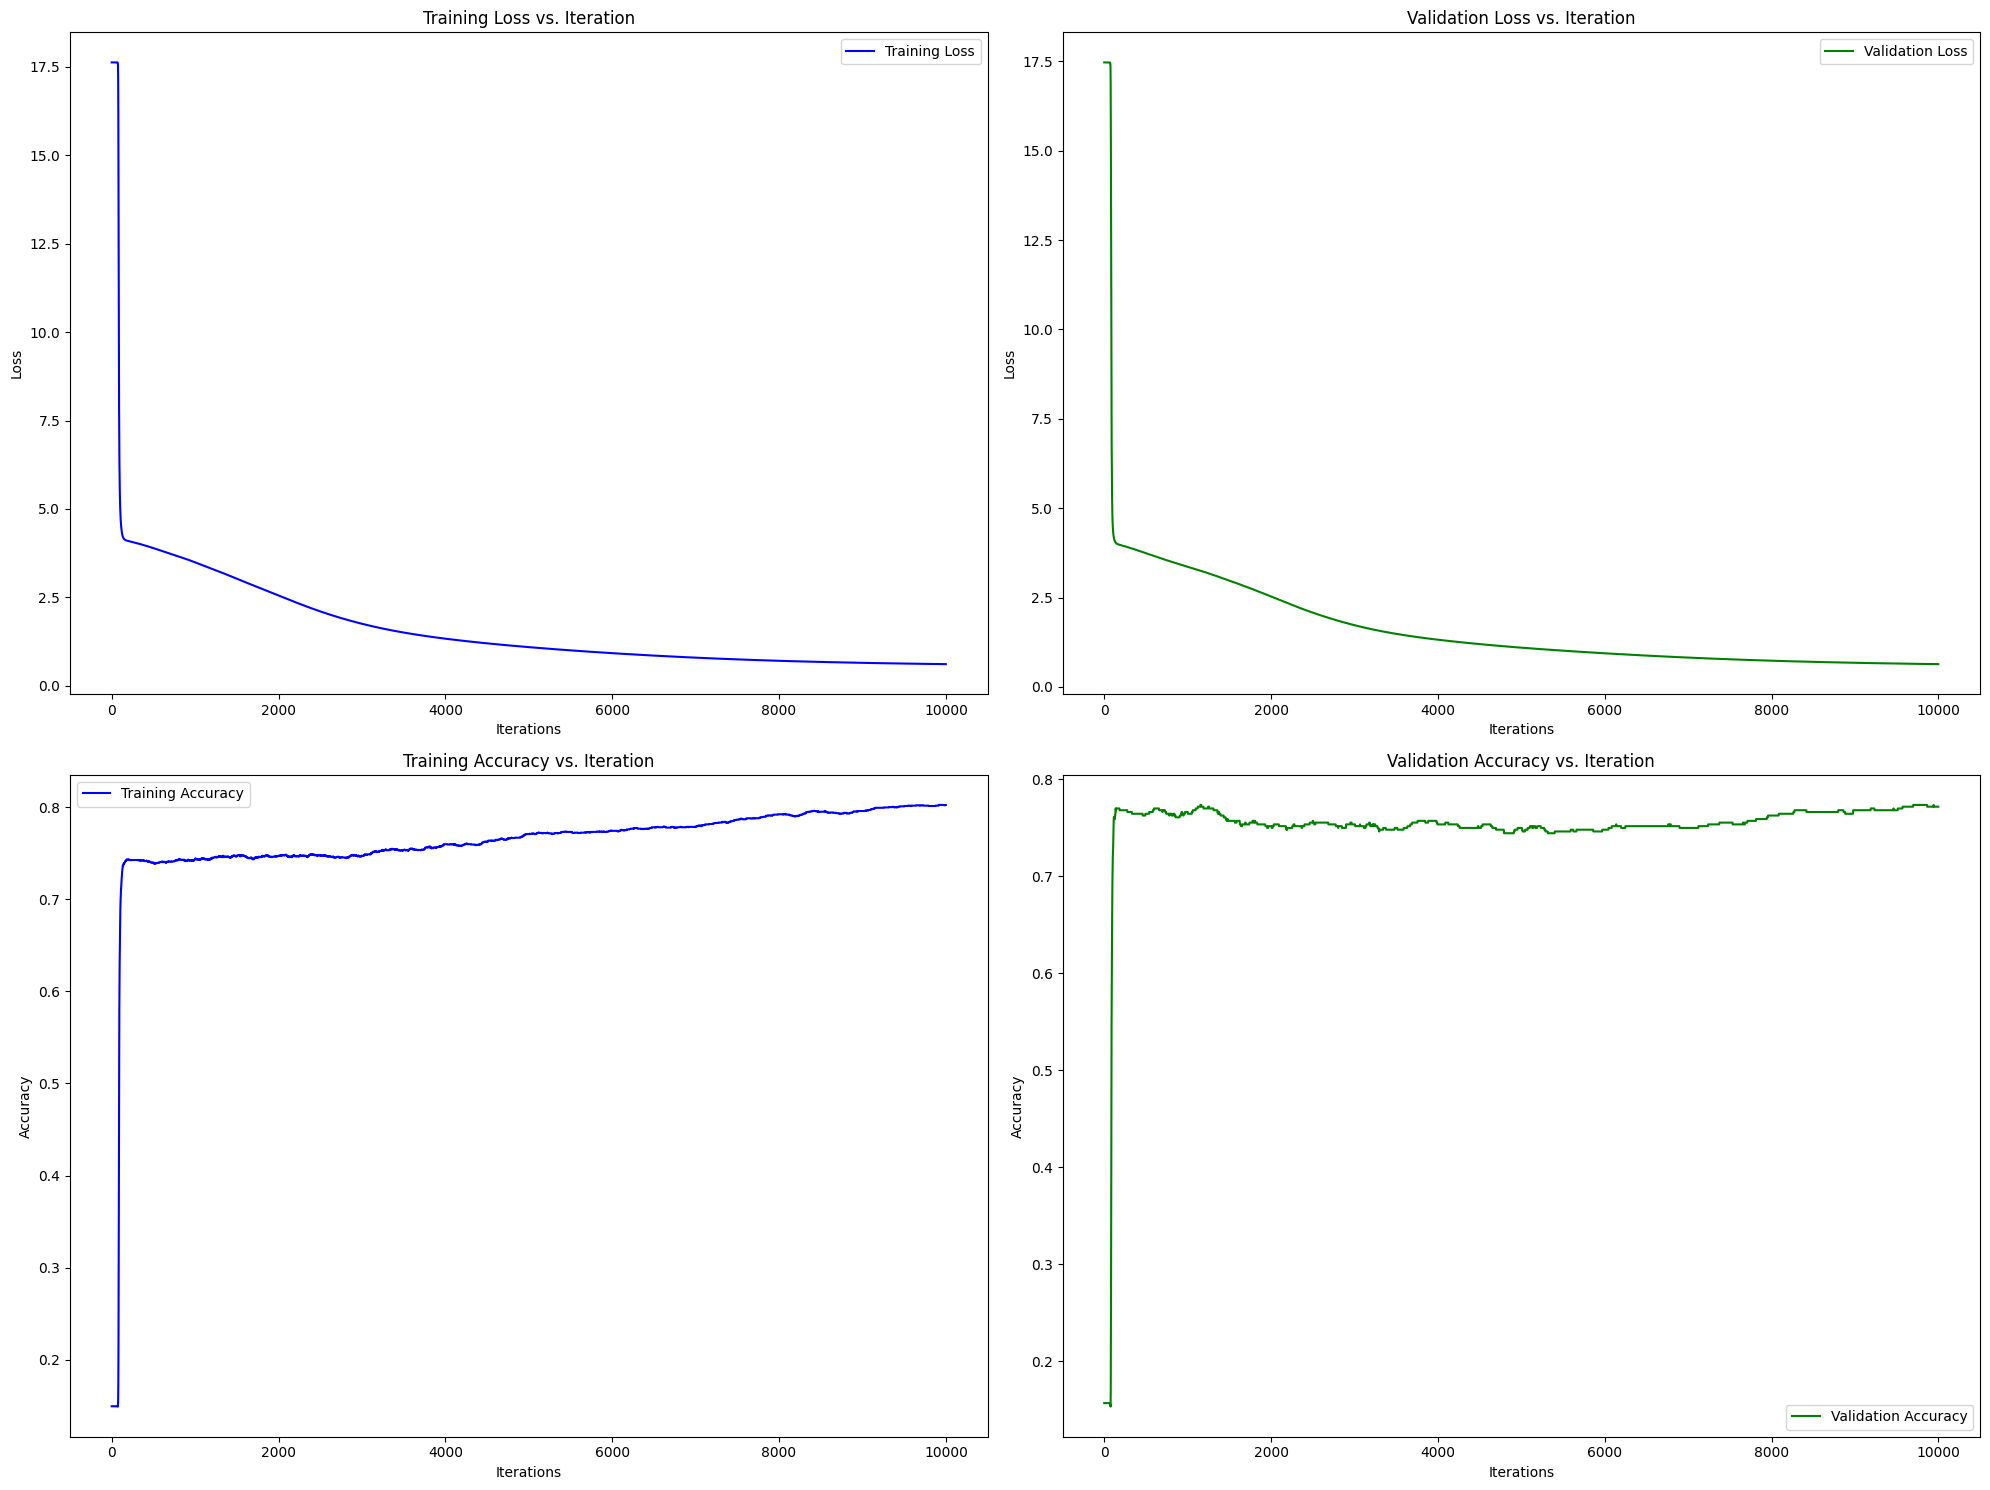

Test Accuracy: 0.8069


In [4]:
# a)
# Train the model
W, b, train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression(X_train, y_train, X_val, y_val)

# Evaluate on test set
test_pred = predict(X_test, W, b)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

## b.
## Feature scaling and normalisation
- Many machine learning algorithms can run into problems when scales of the features are very different. Some features can overplay others.
- For example in gradient descent we have a single common parameter $\eta$ for all featues. This can be problematic we features are of different orders but changes with same parameter.
- One solution for this problem is too rescale the featues soo that they have same order.

## Different ways to scale features
Sure, here are the first three feature scaling methods in Markdown code format:

### 1. **Min-Max Scaling (Normalization)**

```
x_scaled = (x - x_min) / (x_max - x_min)
```

where `x_min` and `x_max` are the minimum and maximum values of the feature, respectively.

### 2. **Standardization**

```
x_scaled = (x - μ) / σ
```

where `μ` is the mean and `σ` is the standard deviation of the feature.

## For this Question
- we will be **Min-Max scaling**.
## Impact of Feature Scaling on Gradient Descent

When training machine learning models, particularly with datasets like `heatdisease.csv`, feature scaling plays a crucial role in the effectiveness of optimization algorithms such as gradient descent.

### 1. **Different Feature Ranges**

In the `heatdisease.csv` dataset, features such as `age`, `totChol`, and `sysBP` can have significantly different ranges. For example:

- **Age**: 39 to 63
- **Total Cholesterol (totChol)**: 195 to 285
- **Systolic Blood Pressure (sysBP)**: 106 to 180

### 2. **Effects of No Scaling**

Without scaling, features with larger ranges (e.g., `totChol`) can disproportionately influence the model's predictions. This can lead to:

- **Slow Convergence**: The gradient descent algorithm may take longer to converge as it struggles to balance updates across features.
- **Instability**: The model may overshoot the optimal solution, resulting in erratic training behavior.

### 3. **Benefits of Min-Max Scaling**

Min-Max scaling transforms features to a common range, typically [0, 1], ensuring that all features contribute equally to the model's learning. Key benefits include:

- **Faster Convergence**: With scaled features, the gradient descent algorithm can converge more quickly and smoothly.
- **Improved Stability**: The updates to model parameters are more balanced, reducing the risk of overshooting the optimal solution.
- **Larger Learning Rates**: Scaling allows for the use of larger learning rates, which can further expedite the training process.

## Conclusion

In summary, applying Min-Max scaling to features in datasets like `heatdisease.csv` is essential for enhancing the performance of gradient descent. It ensures that all features are treated equally, leading to faster convergence and more stable training outcomes.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
# data = pd.read_csv('HeartDisease.csv')
# Separate features and target
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values

# Custom min-max scaling function
def min_max_scale(X):
    X_scaled = np.zeros_like(X, dtype=float)
    for i in range(X.shape[1]):
        col_min = np.min(X[:, i])
        col_max = np.max(X[:, i])
        if col_max - col_min != 0:
            X_scaled[:, i] = (X[:, i] - col_min) / (col_max - col_min)
        else:
            X_scaled[:, i] = X[:, i]  # If max and min are the same, keep the original values
    return X_scaled

# Split the data
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply min-max scaling to traning, valuation and testing data set
X_train_scaled = min_max_scale(X_train)
X_val_scaled = min_max_scale(X_val)
X_test_scaled = min_max_scale(X_test)
print(X_train_scaled)
print(X_val_scaled)
print(X_test_scaled)


[[0.         0.34210526 0.33333333 ... 0.28488173 0.20408163 0.04237288]
 [0.         0.71052632 0.66666667 ... 0.3435036  0.2755102  0.10451977]
 [0.         0.44736842 0.         ... 0.25094275 0.47959184 0.06497175]
 ...
 [1.         0.39473684 1.         ... 0.435036   0.03061224 0.10169492]
 [1.         0.55263158 0.33333333 ... 0.41858073 0.2244898  0.18079096]
 [1.         0.47368421 0.33333333 ... 0.52622557 0.15306122 0.0819209 ]]
[[0.         0.58333333 0.         ... 0.26640548 0.30263158 0.06497175]
 [0.         0.38888889 1.         ... 0.14813908 0.18421053 0.09322034]
 [1.         0.11111111 0.66666667 ... 0.29652302 0.61842105 0.11581921]
 ...
 [0.         0.77777778 0.         ... 0.33153771 0.31578947 0.61016949]
 [1.         0.27777778 0.         ... 0.3572478  0.53947368 0.10451977]
 [1.         0.13888889 1.         ... 0.33790402 0.80263158 0.06497175]]
[[0.         0.14705882 0.33333333 ... 0.29165134 0.6031746  0.11764706]
 [0.         0.76470588 0.33333333 ... 

Iteration 0: Train Loss: 4.1830, Validation Loss: 4.1013
Iteration 100: Train Loss: 2.5957, Validation Loss: 2.5593
Iteration 200: Train Loss: 1.3587, Validation Loss: 1.3607
Iteration 300: Train Loss: 0.7523, Validation Loss: 0.7704
Iteration 400: Train Loss: 0.5503, Validation Loss: 0.5704
Iteration 500: Train Loss: 0.4824, Validation Loss: 0.5018
Iteration 600: Train Loss: 0.4561, Validation Loss: 0.4746
Iteration 700: Train Loss: 0.4445, Validation Loss: 0.4624
Iteration 800: Train Loss: 0.4388, Validation Loss: 0.4564
Iteration 900: Train Loss: 0.4359, Validation Loss: 0.4533
Iteration 1000: Train Loss: 0.4343, Validation Loss: 0.4516
Iteration 1100: Train Loss: 0.4334, Validation Loss: 0.4506
Iteration 1200: Train Loss: 0.4329, Validation Loss: 0.4500
Iteration 1300: Train Loss: 0.4326, Validation Loss: 0.4497
Iteration 1400: Train Loss: 0.4324, Validation Loss: 0.4496
Iteration 1500: Train Loss: 0.4323, Validation Loss: 0.4496
Iteration 1600: Train Loss: 0.4324, Validation Loss:

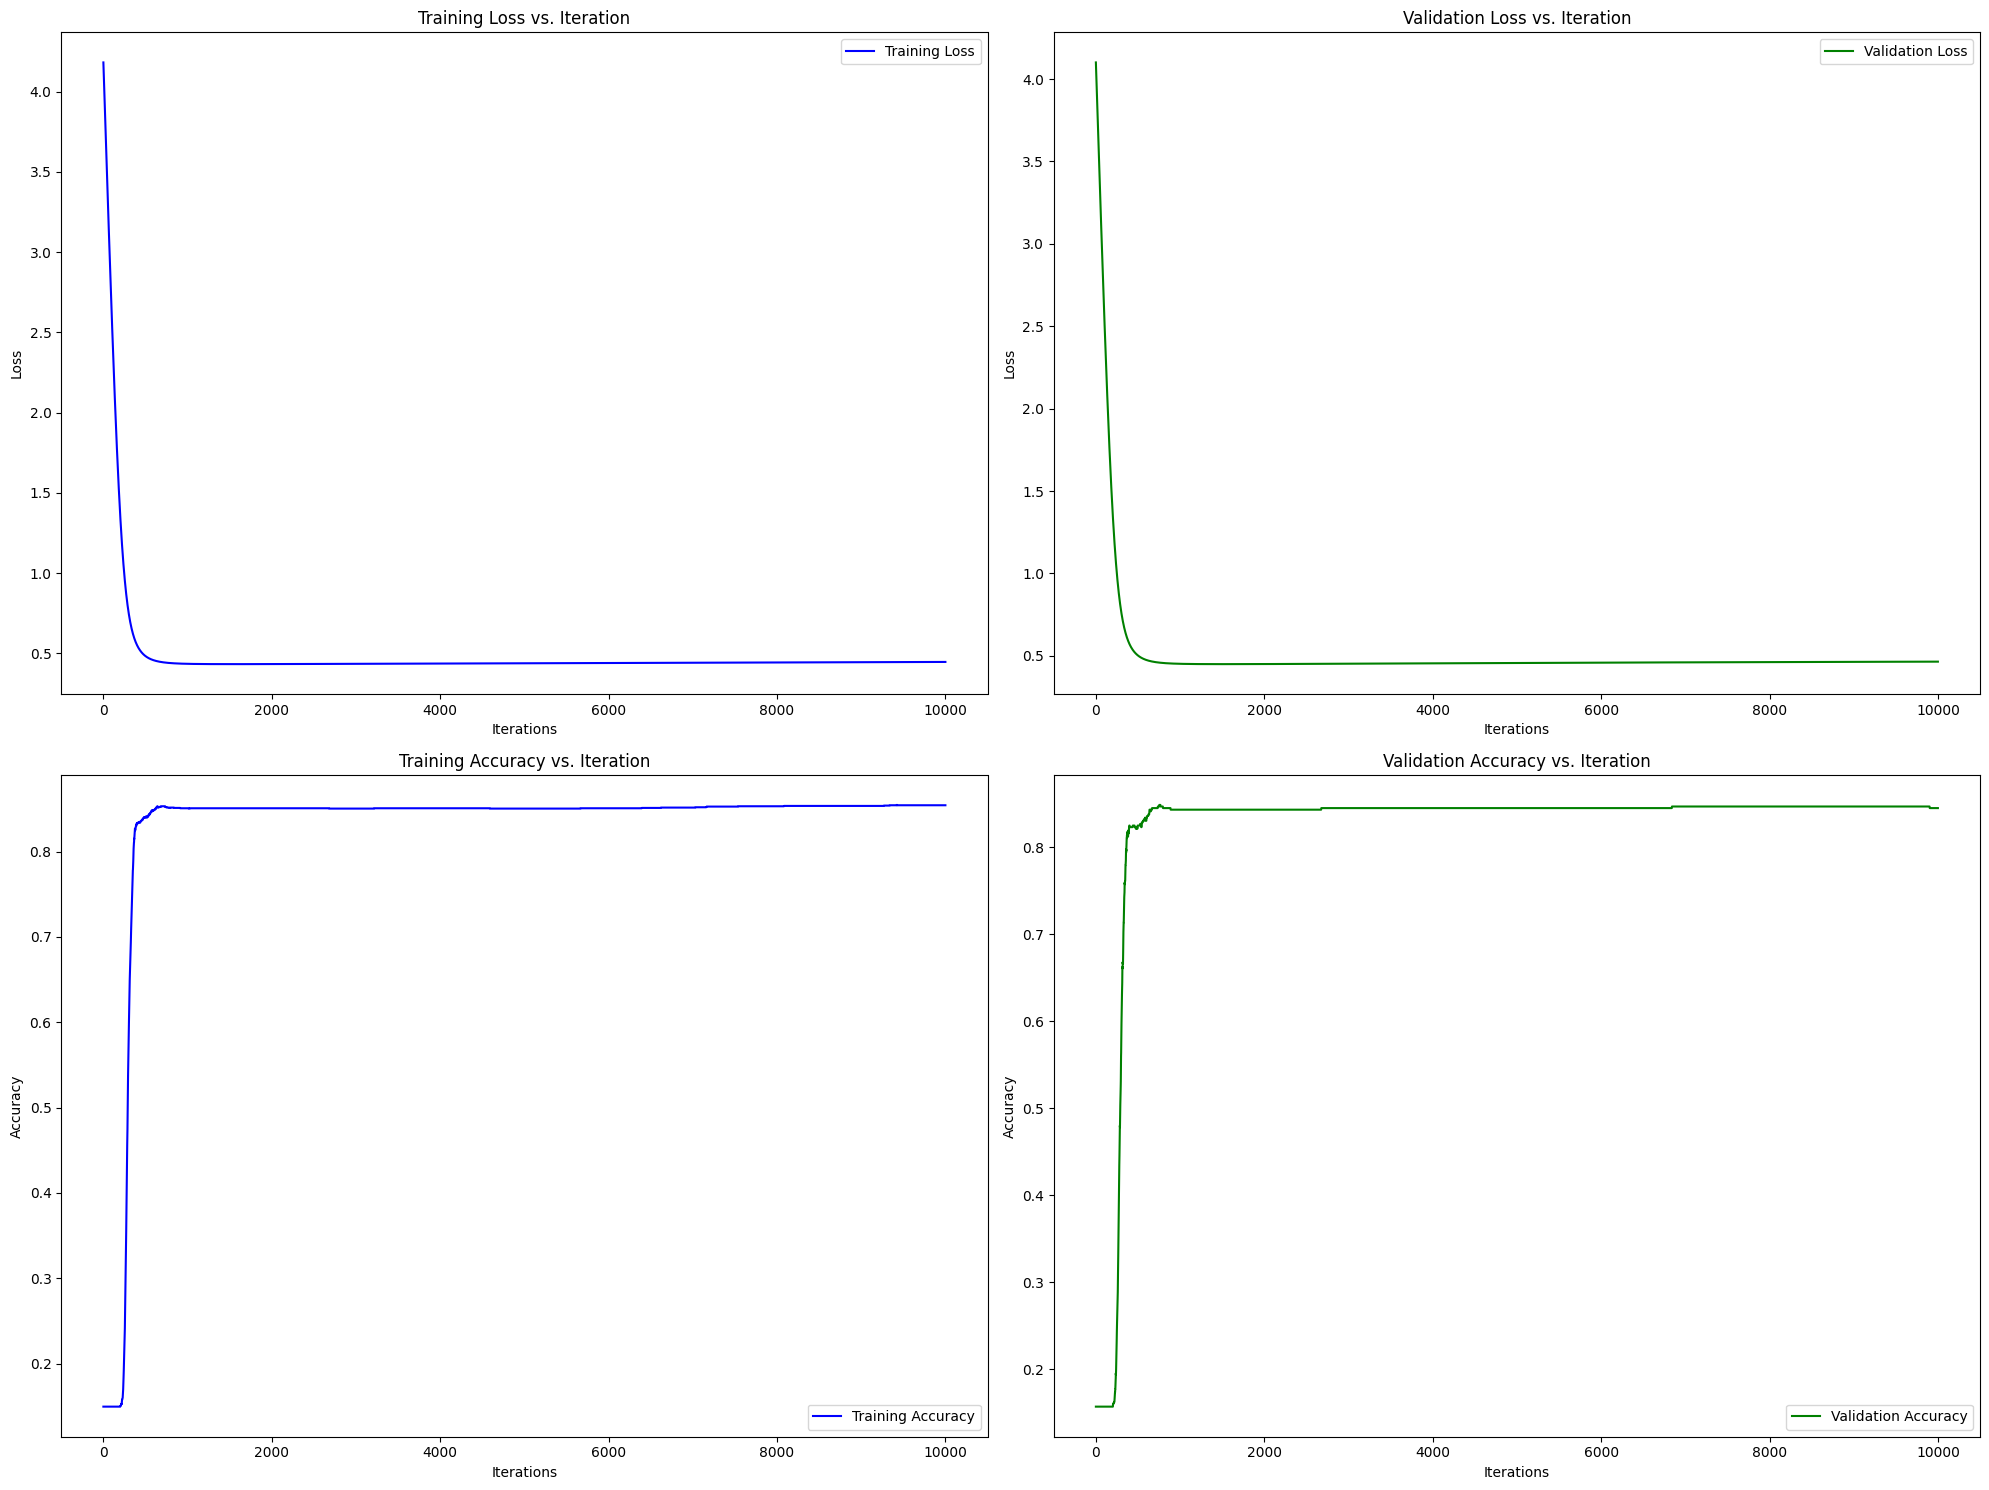

Test Accuracy (Min-Max Scaling): 0.8379


ValueError: shapes (549,15) and (1000,) not aligned: 15 (dim 1) != 1000 (dim 0)

In [20]:
W_scaled, b_scaled, train_losses_scaled, val_losses_scaled, train_acc_scaled, val_acc_scaled = logistic_regression(X_train_scaled, y_train, X_val_scaled, y_val,learning_rate=0.01,iterations=10000) 
# W_unscaled, b_unscaled, train_losses_unscaled, val_losses_unscaled, train_acc_unscaled, val_acc_unscaled = logistic_regression(X_train, y_train, X_val, y_val)
# we can use these from part a) that didn't use any feature scaling
W_unscaled = W
b_unscaled = b
train_losses_unscaled = train_losses
val_losses_unscaled = val_losses
train_acc_unscaled = train_accuracies
val_acc_unscaled = val_accuracies


# Evaluate on test set
# For model using Min-Max scaling
test_pred_scaled = predict(X_test_scaled, W_scaled, b_scaled)
test_accuracy_scaled = accuracy_score(y_test, test_pred_scaled)
print(f"Test Accuracy (Min-Max Scaling): {test_accuracy_scaled:.4f}")

# Model with No scaling
test_pred_unscaled = predict(X_test, W_unscaled, b_unscaled)
test_accuracy_unscaled = accuracy_score(y_test, test_pred_unscaled)
print(f"Test Accuracy (No Scaling): {test_accuracy_unscaled:.4f}")

# Plot loss
plt.figure(figsize=(15, 10))
plt.plot(train_losses_scaled, label='Min-Max Scaling - Training', color='blue')
plt.plot(val_losses_scaled, label='Min-Max Scaling - Validation', color='blue', linestyle='--')
plt.plot(train_losses_unscaled, label='No Scaling - Training', color='red')
plt.plot(val_losses_unscaled, label='No Scaling - Validation', color='red', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration: Min-Max Scaling vs No Scaling')
plt.legend()
plt.tight_layout()
plt.show()

# Plot accuracy
plt.figure(figsize=(15, 10))
plt.plot(train_acc_scaled, label='Min-Max Scaling - Training', color='blue')
plt.plot(val_acc_scaled, label='Min-Max Scaling - Validation', color='blue', linestyle='--')
plt.plot(train_acc_unscaled, label='No Scaling - Training', color='red')
plt.plot(val_acc_unscaled, label='No Scaling - Validation', color='red', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration: Min-Max Scaling vs No Scaling')
plt.legend()
plt.tight_layout()
plt.show()

## c.
To calculate and present the confusion matrix and report performance metrics (precision, recall, F1 score, and ROC-AUC score), you can use the following steps:

1. **Confusion Matrix**: A 2x2 matrix summarizing the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). The confusion matrix provides a comprehensive view of the model's performance, highlighting the types of errors made and the overall accuracy.

2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives:

   Precision = TP / (TP + FP)
   
   Precision measures the model's ability to avoid false positives, indicating how many of the predicted positive cases are actually positive. It is useful when the cost of false positives is high.

3. **Recall**: The ratio of correctly predicted positive observations to all actual positives:

   Recall = TP / (TP + FN)
   
   Recall measures the model's ability to identify all positive cases, indicating how many of the actual positive cases were correctly identified. It is useful when the cost of false negatives is high.

4. **F1 Score**: The harmonic mean of precision and recall:

   F1 = 2 × (Precision × Recall) / (Precision + Recall)
   
   The F1 score provides a **balanced measure of the model's performance**, considering both precision and recall. It is useful when there is a need to balance the trade-off between precision and recall.

5. **ROC-AUC**: 
- The area under the Receiver Operating Characteristic curve, which plots the true positive rate (recall) against the false positive rate.
- ROC-AUC measures the model's ability to distinguish between positive and negative classes across different classification thresholds. It is useful for evaluating the overall performance of the model and comparing different models.


In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Function to evaluate the model on the validation set
def evaluate_model(X_val, y_val, W, b):
    # Predict the probabilities and the binary class labels for validation set
    y_val_prob = sigmoid(np.dot(X_val, W) + b)
    y_val_pred = [1 if prob > 0.5 else 0 for prob in y_val_prob]

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    print("Confusion Matrix:")
    print(cm)

    # Precision, Recall, F1 Score
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_val, y_val_prob)
    print(f"ROC-AUC Score: {roc_auc}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Plot diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Evaluate the model on the validation set
evaluate_model(X_val_scaled, y_val, W, b)


ValueError: shapes (548,15) and (1000,) not aligned: 15 (dim 1) != 1000 (dim 0)

## d.
- To compare Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent, we’ll modify your gradient descent function to support both methods. Then, we can analyze and plot the results for each optimization algorithm.

### **Gradient Descent**
    - Using previous implementation 
### **Stochastic Gradient Descent (SGD)**
    - In SGD, we update the model's weights after computing the gradient from a single data point. This makes it faster per iteration but more noisy (less stable) in convergence.
### **Mini-Batch Gradient Descent**
    - Mini-Batch Gradient Descent is a compromise between Batch Gradient Descent (uses all data points) and SGD (uses one data point). It processes small batches of data, providing a balance between speed and stability.


### **Key Points:**
- **SGD:** We perform an update after each data point.
- **Mini-Batch Gradient Descent:** We perform updates in batches of size 16 and 32 for comparison.
- **Batch Gradient Descent:** all the data is taken into consideration while making a single update to the parameters of our model.
## **Comparison:** The plot_comparison function will plot the loss and accuracy for all methods.
## Discussion on Trade-offs:
**Stochastic Gradient Descent (SGD):**
- **Speed:** Faster for each iteration but can be noisy and less stable in convergence.
- **Convergence:** May oscillate around the optimal solution due to the high variance in gradients.
## Mini-Batch Gradient Descent:
- **Speed:** More stable than SGD, while faster than full-batch gradient descent.
- **Convergence:** With the right batch size (e.g., 16 or 32), it offers a good balance between speed and stability.
## Batch Gradient Descent:
- **Speed:** Slower for each iteration since it uses the entire dataset.
- **Convergence:** More stable but can take longer to converge due to processing the entire dataset each time.

Iteration 0 (sgd): Train Loss: 0.9497824000300923, Validation Loss: 17.471074482816135
Iteration 100 (sgd): Train Loss: 0.45654011267429884, Validation Loss: 17.471074482816135
Iteration 200 (sgd): Train Loss: 0.46615872493697197, Validation Loss: 17.471074482816135
Iteration 300 (sgd): Train Loss: 0.47162044082445664, Validation Loss: 17.471074482816135
Iteration 400 (sgd): Train Loss: 0.47483905859259273, Validation Loss: 17.471074482816135
Iteration 500 (sgd): Train Loss: 0.47689180809889714, Validation Loss: 17.471074482816135
Iteration 600 (sgd): Train Loss: 0.47829191463072246, Validation Loss: 17.471074482816135
Iteration 700 (sgd): Train Loss: 0.47929391746110295, Validation Loss: 17.471074482816135
Iteration 800 (sgd): Train Loss: 0.48003618790039265, Validation Loss: 17.471074482816135
Iteration 900 (sgd): Train Loss: 0.48060083975378853, Validation Loss: 17.471074482816135
Iteration 0 (mini_batch): Train Loss: 3.935800643623282, Validation Loss: 17.471074482816135
Iteration 

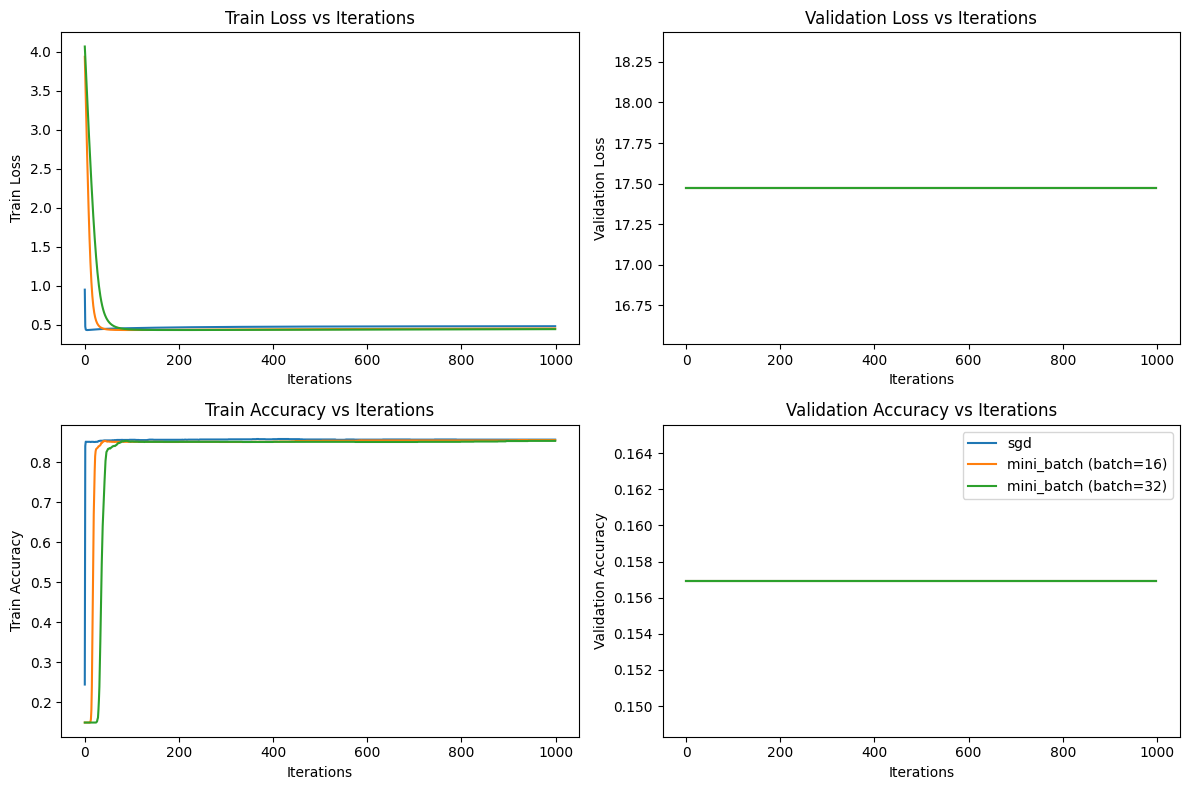

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Stochastic Gradient Descent (SGD)
def sgd(X, y, W, b, learning_rate):
    for i in range(X.shape[0]):
        X_i = X[i, :].reshape(1, -1)
        y_i = y[i].reshape(-1, 1)
        W, b = gradient_descent(X_i, y_i, W, b, learning_rate)
    return W, b

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, W, b, batch_size, learning_rate):
    m = X.shape[0]
    idx = np.random.permutation(m)
    X_shuffled = X[idx]
    y_shuffled = y[idx]
    
    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        y_batch = y_shuffled[i:i + batch_size]
        W, b = gradient_descent(X_batch, y_batch, W, b, learning_rate)
    
    return W, b

# Logistic Regression with different optimizers
def logistic_regression_with_optimizer(X_train, y_train, X_val, y_val, optimizer='sgd', batch_size=None, learning_rate=0.001, iterations=1000):
    n = X_train.shape[1]
    W, b = initialize_parameters(n)
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for i in range(iterations):
        if optimizer == 'sgd':
            W, b = sgd(X_train, y_train, W, b, learning_rate)
        elif optimizer == 'mini_batch':
            W, b = mini_batch_gradient_descent(X_train, y_train, W, b, batch_size, learning_rate)
        
        # Calculate predictions and loss
        y_train_pred = sigmoid(np.dot(X_train, W) + b)
        y_val_pred = sigmoid(np.dot(X_val, W) + b)
        
        train_loss = compute_loss(y_train, y_train_pred)
        val_loss = compute_loss(y_val, y_val_pred)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Calculate accuracy
        train_acc = accuracy_score(y_train, predict(X_train, W, b))
        val_acc = accuracy_score(y_val, predict(X_val, W, b))
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        if i % 100 == 0:
            print(f"Iteration {i} ({optimizer}): Train Loss: {train_loss}, Validation Loss: {val_loss}")
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Function to plot results for different optimizers
def plot_comparison(optimizers, X_train, y_train, X_val, y_val):
    plt.figure(figsize=(12, 8))

    for optimizer, batch_size in optimizers:
        train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression_with_optimizer(
            X_train, y_train, X_val, y_val, optimizer=optimizer, batch_size=batch_size)
        
        plt.subplot(2, 2, 1)
        plt.plot(train_losses, label=f'{optimizer} (batch={batch_size})' if batch_size else optimizer)
        plt.xlabel('Iterations')
        plt.ylabel('Train Loss')
        plt.title('Train Loss vs Iterations')
        
        plt.subplot(2, 2, 2)
        plt.plot(val_losses, label=f'{optimizer} (batch={batch_size})' if batch_size else optimizer)
        plt.xlabel('Iterations')
        plt.ylabel('Validation Loss')
        plt.title('Validation Loss vs Iterations')

        plt.subplot(2, 2, 3)
        plt.plot(train_accuracies, label=f'{optimizer} (batch={batch_size})' if batch_size else optimizer)
        plt.xlabel('Iterations')
        plt.ylabel('Train Accuracy')
        plt.title('Train Accuracy vs Iterations')
        
        plt.subplot(2, 2, 4)
        plt.plot(val_accuracies, label=f'{optimizer} (batch={batch_size})' if batch_size else optimizer)
        plt.xlabel('Iterations')
        plt.ylabel('Validation Accuracy')
        plt.title('Validation Accuracy vs Iterations')

    plt.tight_layout()
    plt.legend()
    plt.show()

# Compare SGD and Mini-Batch Gradient Descent
optimizers = [
    ('sgd', None),
    ('mini_batch', 16),  # Mini-Batch with size 16
    ('mini_batch', 32),  # Mini-Batch with size 32
]

# Assuming X_train_scaled and X_val are your scaled training and validation data
plot_comparison(optimizers, X_train_scaled, y_train, X_val, y_val)

## Best Overall Method:
**Stochoatic Gradient Descent** performed the best overall:
- It had the lowest validation loss (~0.4750).
- It converged smoothly without fluctuations.
- Although it was slower than Mini-Batch GD initially, it ultimately provided a more stable and better-performing model.

## e.
## Explanation:

1. **KFold**: This function from `sklearn.model_selection` splits the dataset into `k` folds. It shuffles the data to ensure randomness.

2. **Logistic Regression**: The model is trained using your implementation of logistic regression with gradient descent.

3. **Metrics**:
   * `accuracy_score`: Overall accuracy of the model.
   * `precision_score`: How many of the predicted positive cases are true positives.
   * `recall_score`: How many of the actual positive cases are identified by the model.
   * `f1_score`: Harmonic mean of precision and recall, balancing both.

4. **Mean and Standard Deviation**: After all folds are evaluated, we compute the mean and standard deviation to assess the stability of the model's performance.

## Discussion on Stability and Variance:

* **Stability**: The mean of the metrics across the folds gives you an idea of how the model performs on average.

* **Variance**: The standard deviation shows how much the model's performance fluctuates between different folds. A low standard deviation indicates stable performance, while a high standard deviation suggests the model may not generalize well across different subsets of the data.

This approach ensures that the model is robust and not overly dependent on the particular train-test split used.

Fold 1:
Iteration 0: Train Loss: 4.0620, Validation Loss: 3.9566
Iteration 100: Train Loss: 2.5355, Validation Loss: 2.4735
Iteration 200: Train Loss: 1.3510, Validation Loss: 1.3269
Iteration 300: Train Loss: 0.7611, Validation Loss: 0.7606
Iteration 400: Train Loss: 0.5570, Validation Loss: 0.5682
Iteration 500: Train Loss: 0.4862, Validation Loss: 0.5036
Iteration 600: Train Loss: 0.4580, Validation Loss: 0.4792
Iteration 700: Train Loss: 0.4453, Validation Loss: 0.4690
Iteration 800: Train Loss: 0.4391, Validation Loss: 0.4644
Iteration 900: Train Loss: 0.4357, Validation Loss: 0.4622


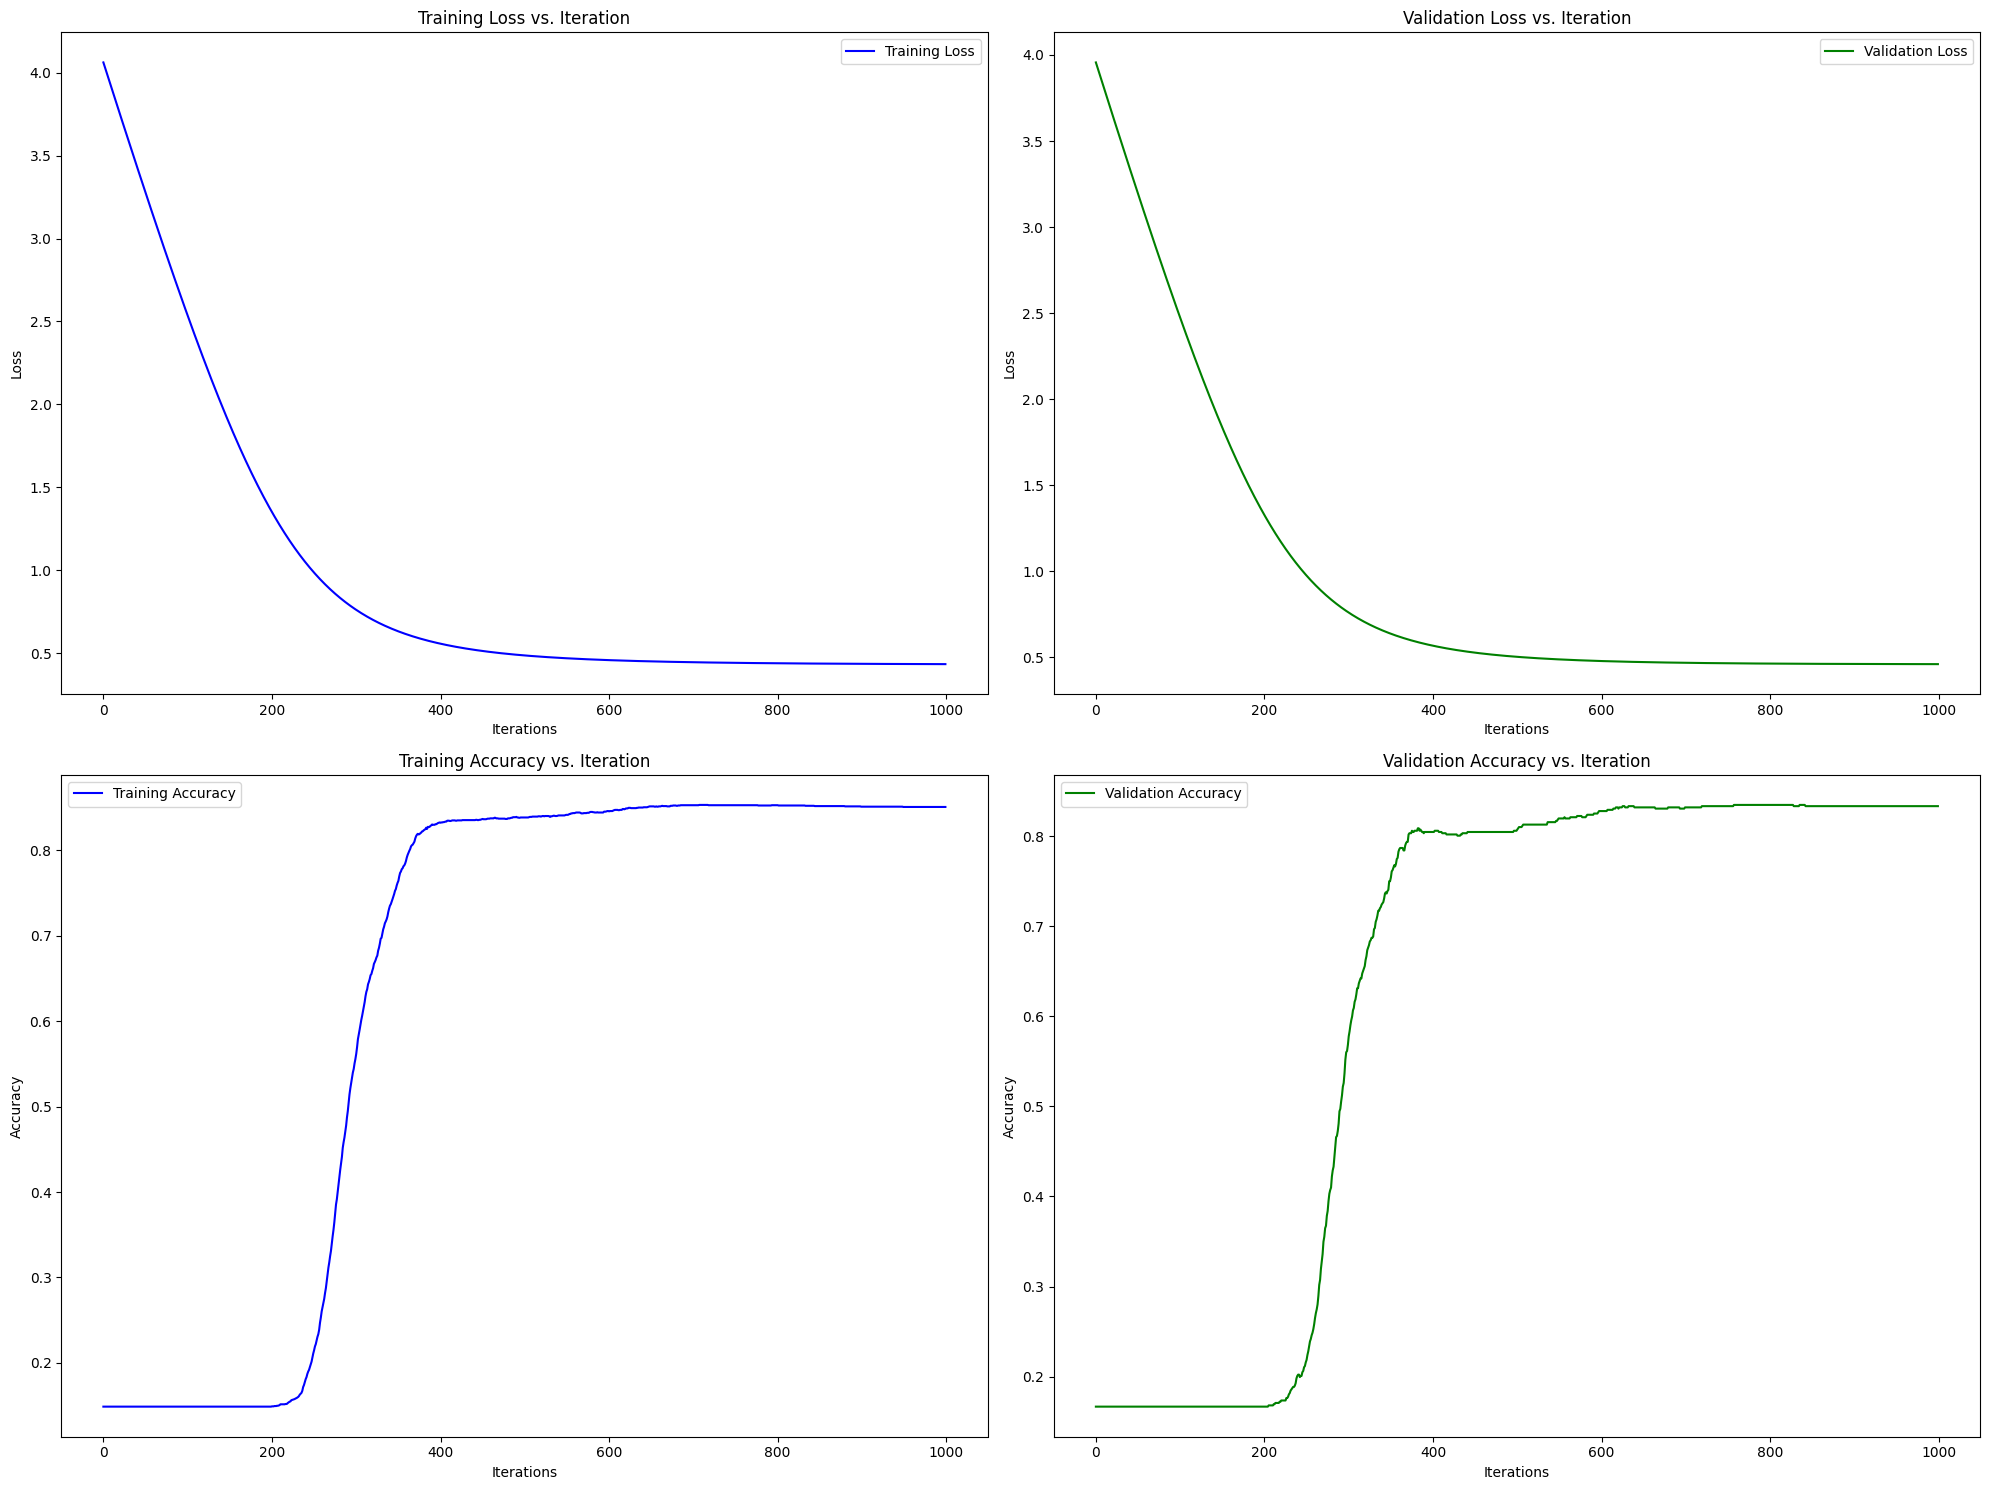

Accuracy: 0.8333, Precision: 0.5000, Recall: 0.0082, F1 Score: 0.0161
Fold 2:
Iteration 0: Train Loss: 4.0494, Validation Loss: 4.0064
Iteration 100: Train Loss: 2.5348, Validation Loss: 2.5044
Iteration 200: Train Loss: 1.3561, Validation Loss: 1.3402
Iteration 300: Train Loss: 0.7661, Validation Loss: 0.7595
Iteration 400: Train Loss: 0.5624, Validation Loss: 0.5575
Iteration 500: Train Loss: 0.4923, Validation Loss: 0.4867
Iteration 600: Train Loss: 0.4648, Validation Loss: 0.4581
Iteration 700: Train Loss: 0.4526, Validation Loss: 0.4449
Iteration 800: Train Loss: 0.4466, Validation Loss: 0.4383
Iteration 900: Train Loss: 0.4435, Validation Loss: 0.4347


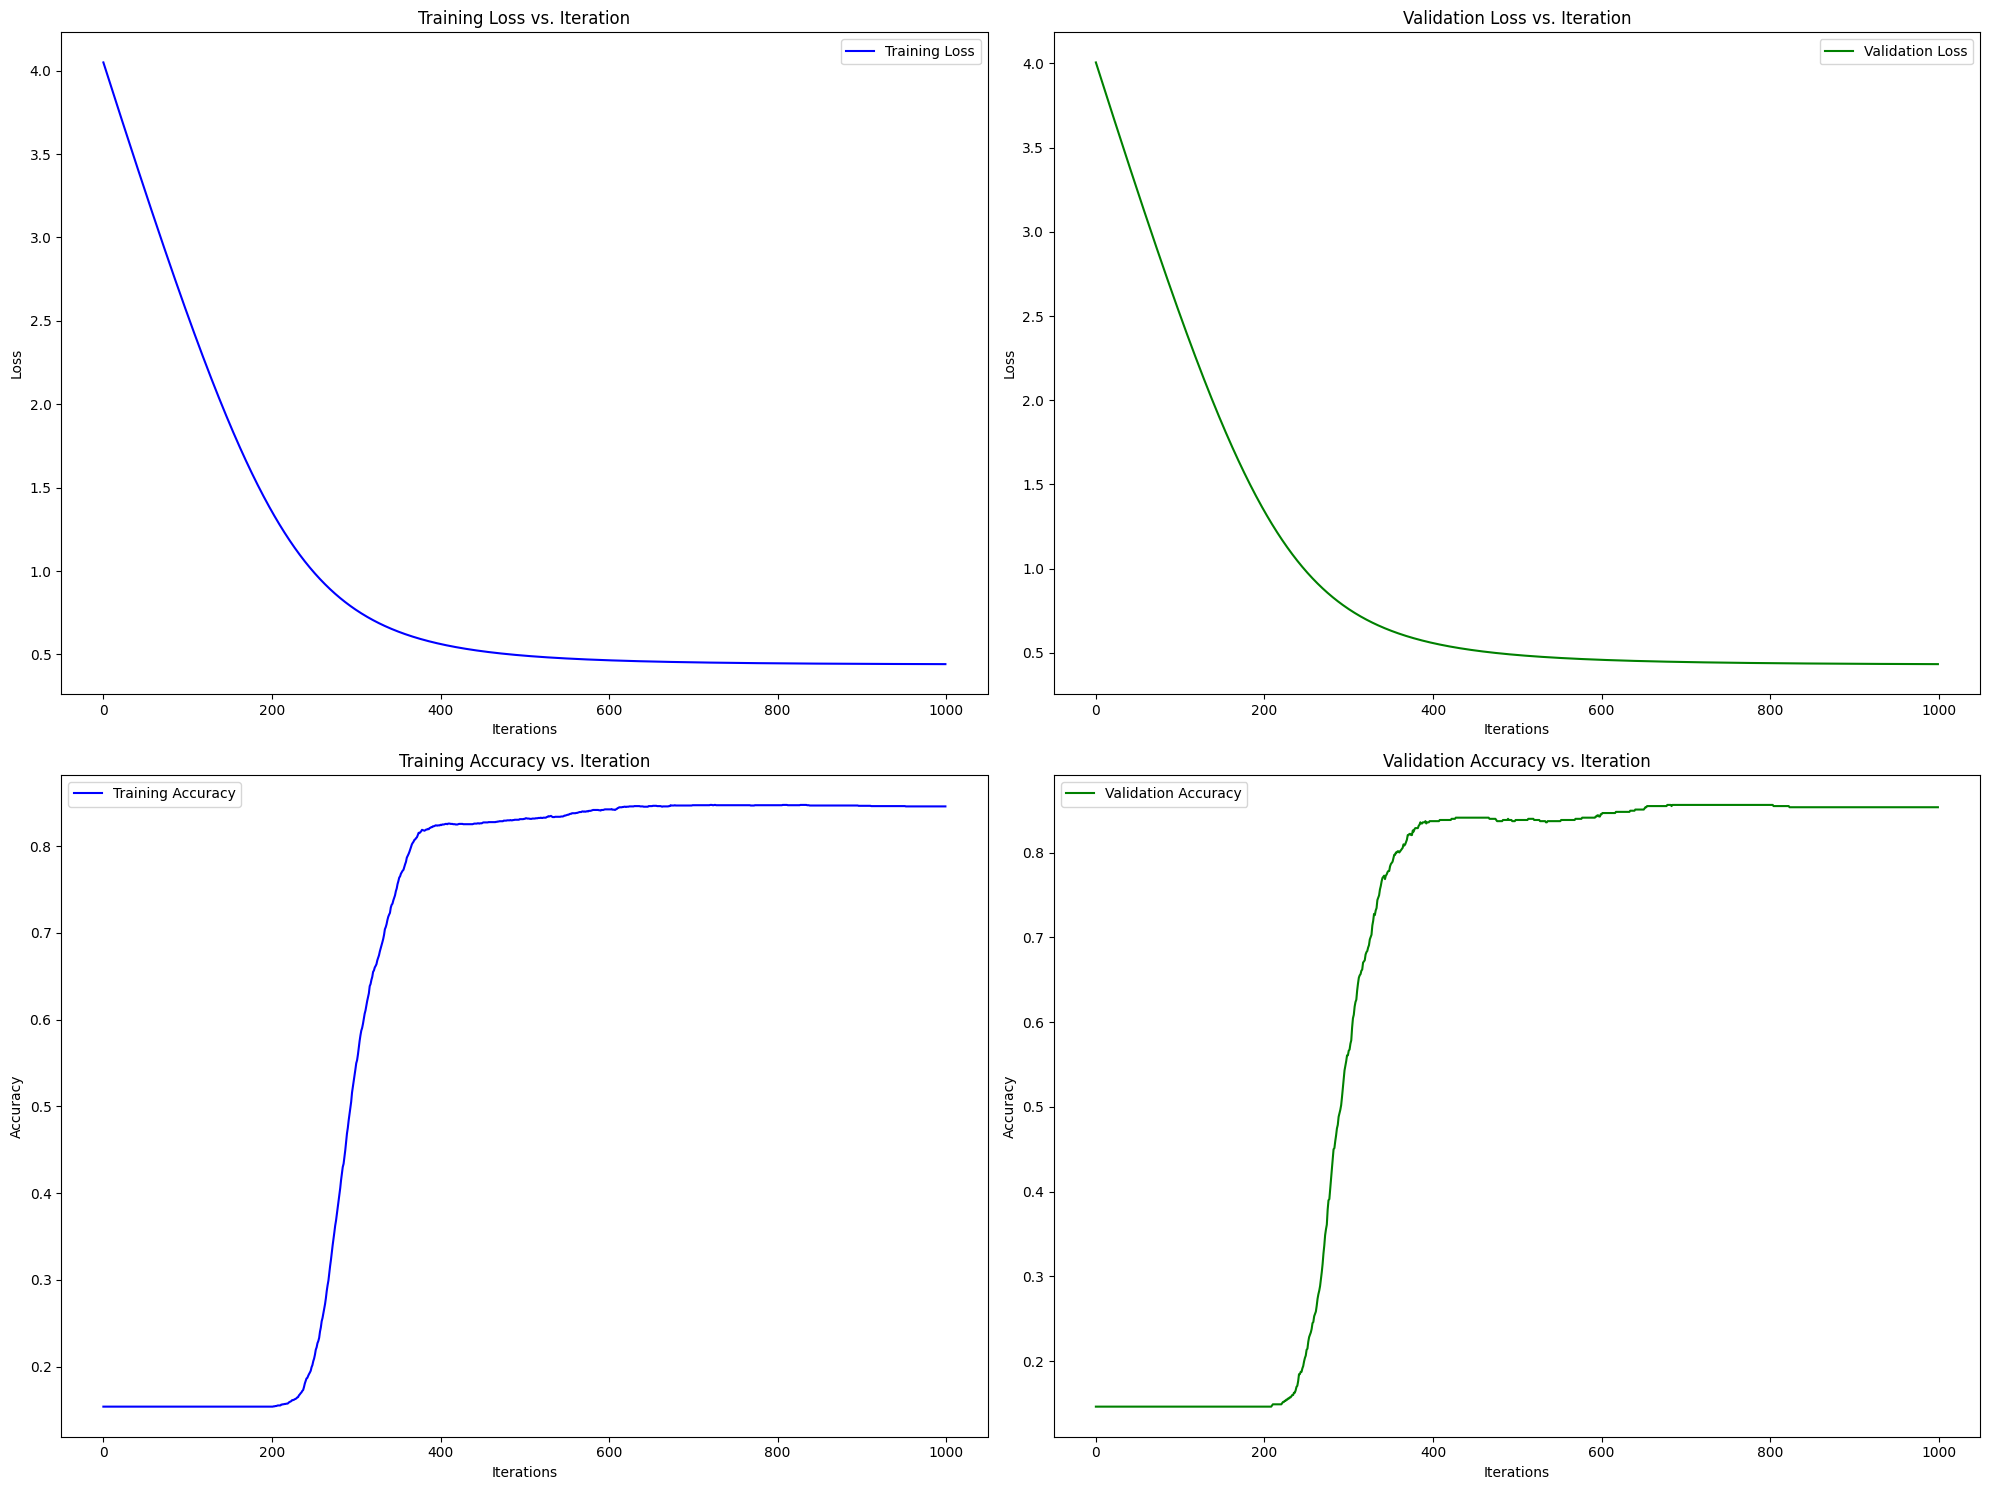

Accuracy: 0.8536, Precision: 0.5000, Recall: 0.0374, F1 Score: 0.0696
Fold 3:
Iteration 0: Train Loss: 4.0434, Validation Loss: 4.0306
Iteration 100: Train Loss: 2.5321, Validation Loss: 2.5213
Iteration 200: Train Loss: 1.3573, Validation Loss: 1.3480
Iteration 300: Train Loss: 0.7681, Validation Loss: 0.7613
Iteration 400: Train Loss: 0.5627, Validation Loss: 0.5593
Iteration 500: Train Loss: 0.4914, Validation Loss: 0.4906
Iteration 600: Train Loss: 0.4631, Validation Loss: 0.4641
Iteration 700: Train Loss: 0.4504, Validation Loss: 0.4526
Iteration 800: Train Loss: 0.4443, Validation Loss: 0.4473
Iteration 900: Train Loss: 0.4411, Validation Loss: 0.4446


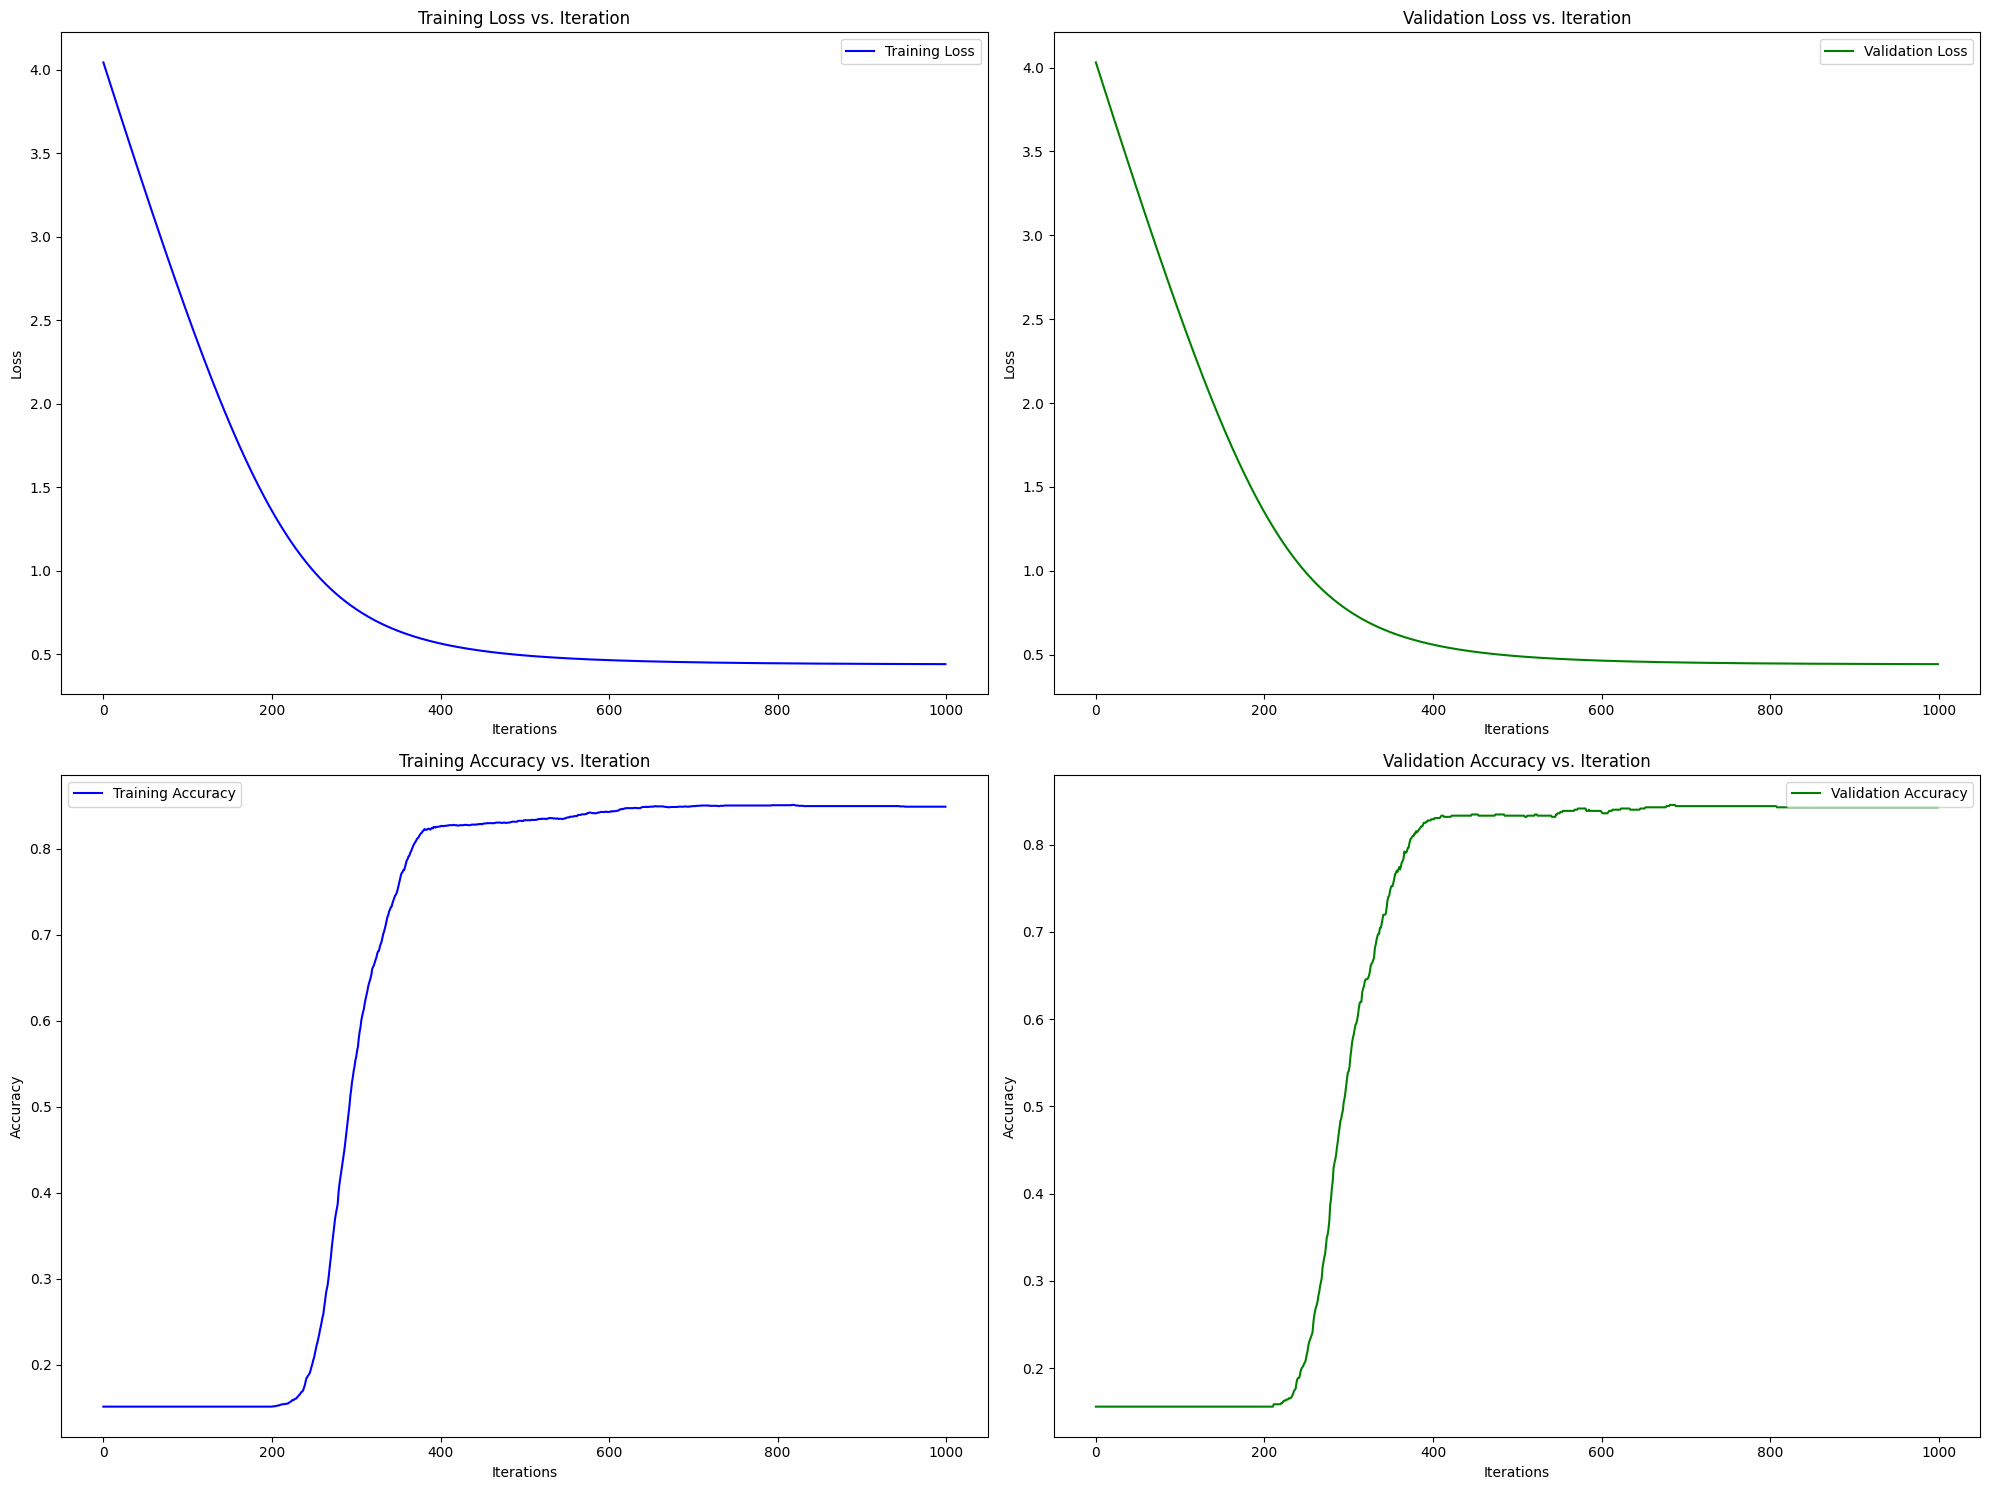

Accuracy: 0.8427, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Fold 4:
Iteration 0: Train Loss: 4.0236, Validation Loss: 4.1104
Iteration 100: Train Loss: 2.5242, Validation Loss: 2.5831
Iteration 200: Train Loss: 1.3582, Validation Loss: 1.3887
Iteration 300: Train Loss: 0.7706, Validation Loss: 0.7812
Iteration 400: Train Loss: 0.5646, Validation Loss: 0.5667
Iteration 500: Train Loss: 0.4930, Validation Loss: 0.4916
Iteration 600: Train Loss: 0.4645, Validation Loss: 0.4618
Iteration 700: Train Loss: 0.4518, Validation Loss: 0.4483
Iteration 800: Train Loss: 0.4456, Validation Loss: 0.4417
Iteration 900: Train Loss: 0.4423, Validation Loss: 0.4382


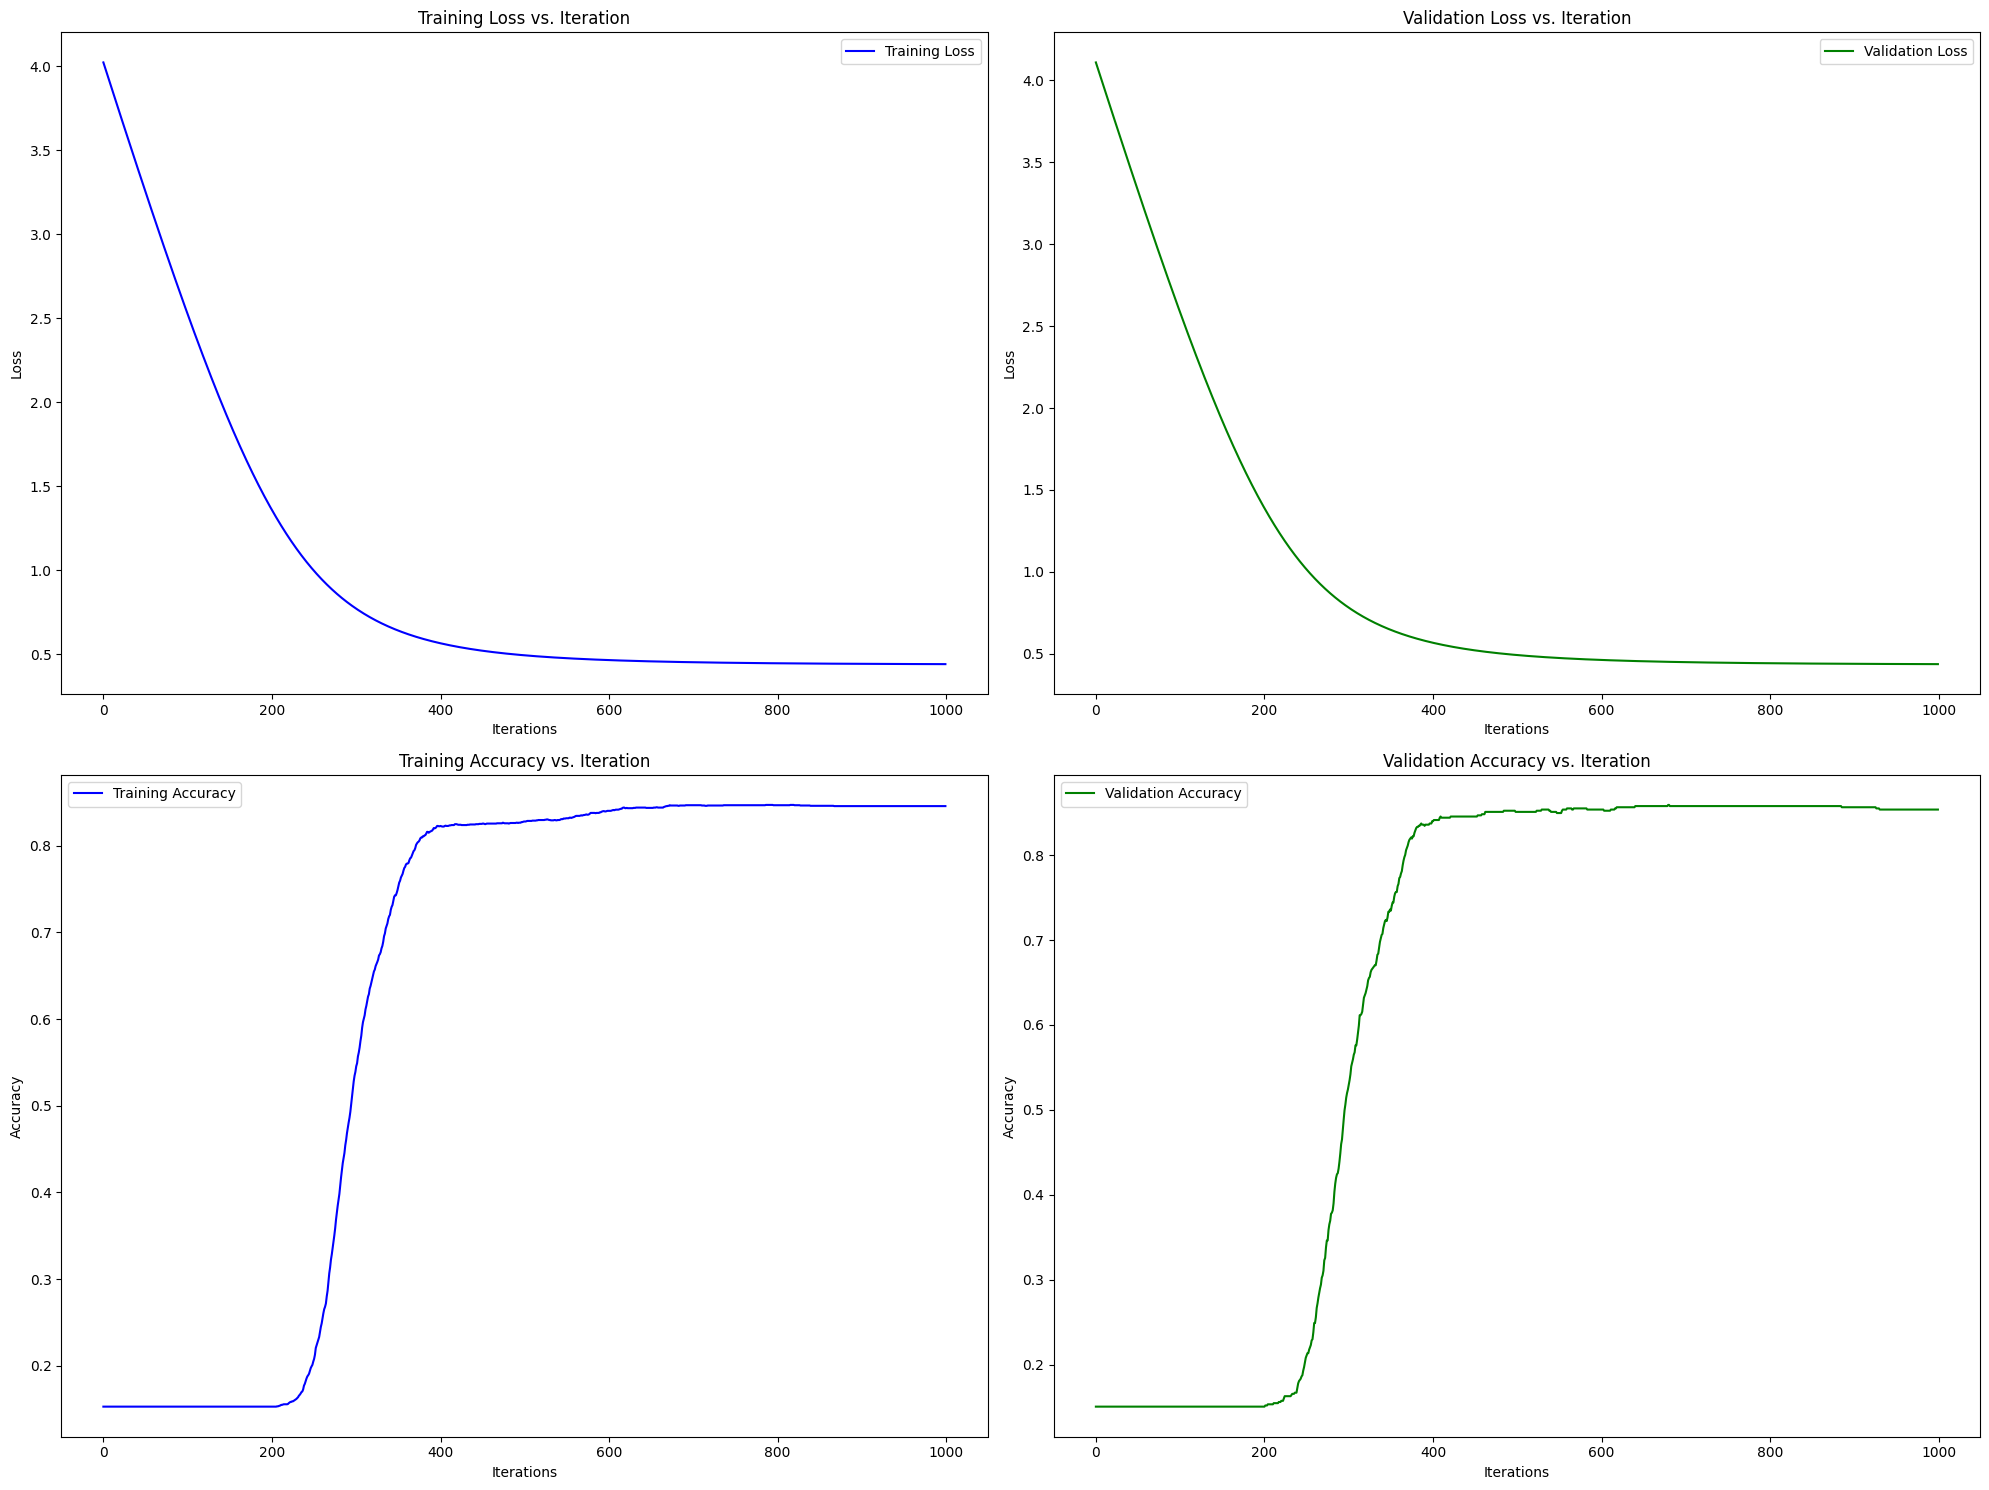

Accuracy: 0.8536, Precision: 1.0000, Recall: 0.0273, F1 Score: 0.0531
Fold 5:
Iteration 0: Train Loss: 4.0260, Validation Loss: 4.1007
Iteration 100: Train Loss: 2.5265, Validation Loss: 2.5730
Iteration 200: Train Loss: 1.3587, Validation Loss: 1.3808
Iteration 300: Train Loss: 0.7707, Validation Loss: 0.7766
Iteration 400: Train Loss: 0.5658, Validation Loss: 0.5626
Iteration 500: Train Loss: 0.4951, Validation Loss: 0.4866
Iteration 600: Train Loss: 0.4673, Validation Loss: 0.4556
Iteration 700: Train Loss: 0.4550, Validation Loss: 0.4412
Iteration 800: Train Loss: 0.4491, Validation Loss: 0.4338
Iteration 900: Train Loss: 0.4460, Validation Loss: 0.4298


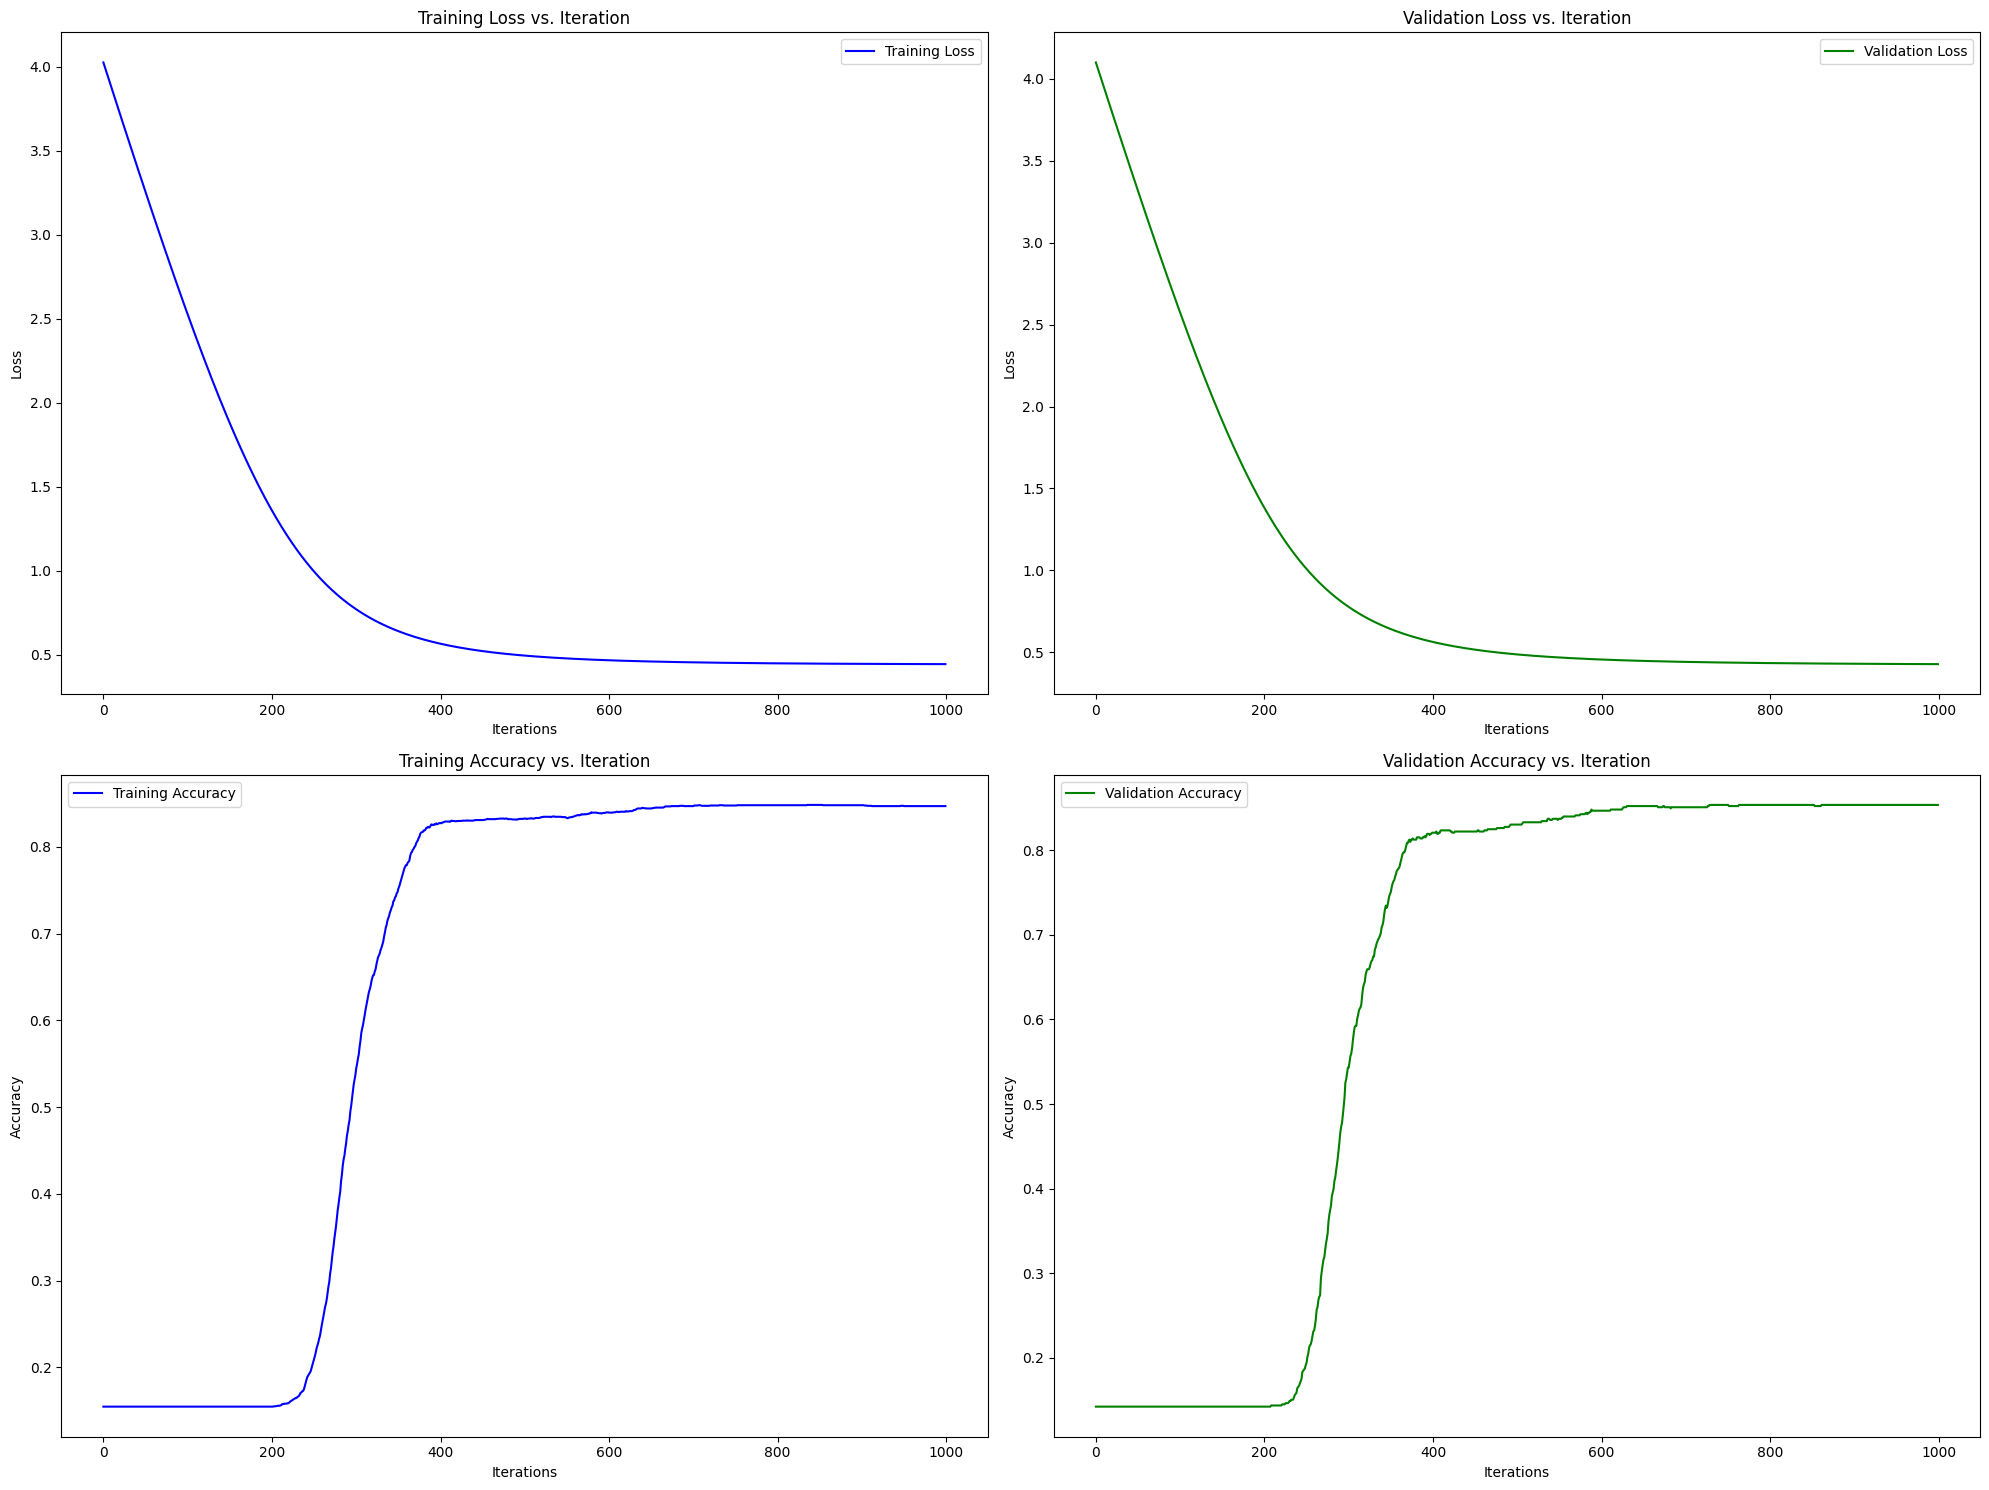

Accuracy: 0.8536, Precision: 0.2000, Recall: 0.0096, F1 Score: 0.0183

--- Cross-Validation Results ---
Average Accuracy: 0.8474 ± 0.0082
Average Precision: 0.4400 ± 0.3382
Average Recall: 0.0165 ± 0.0137
Average F1 Score: 0.0314 ± 0.0258


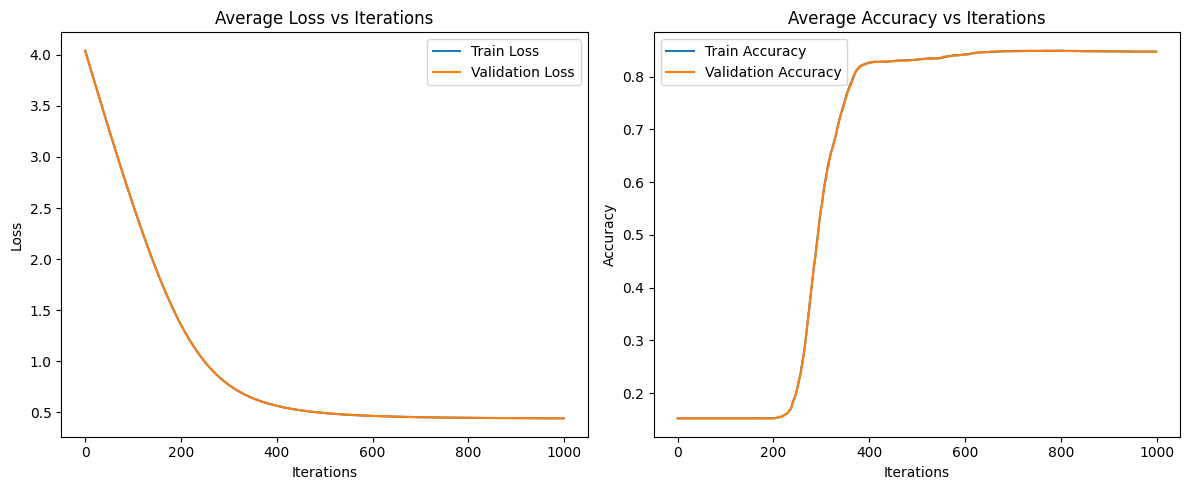

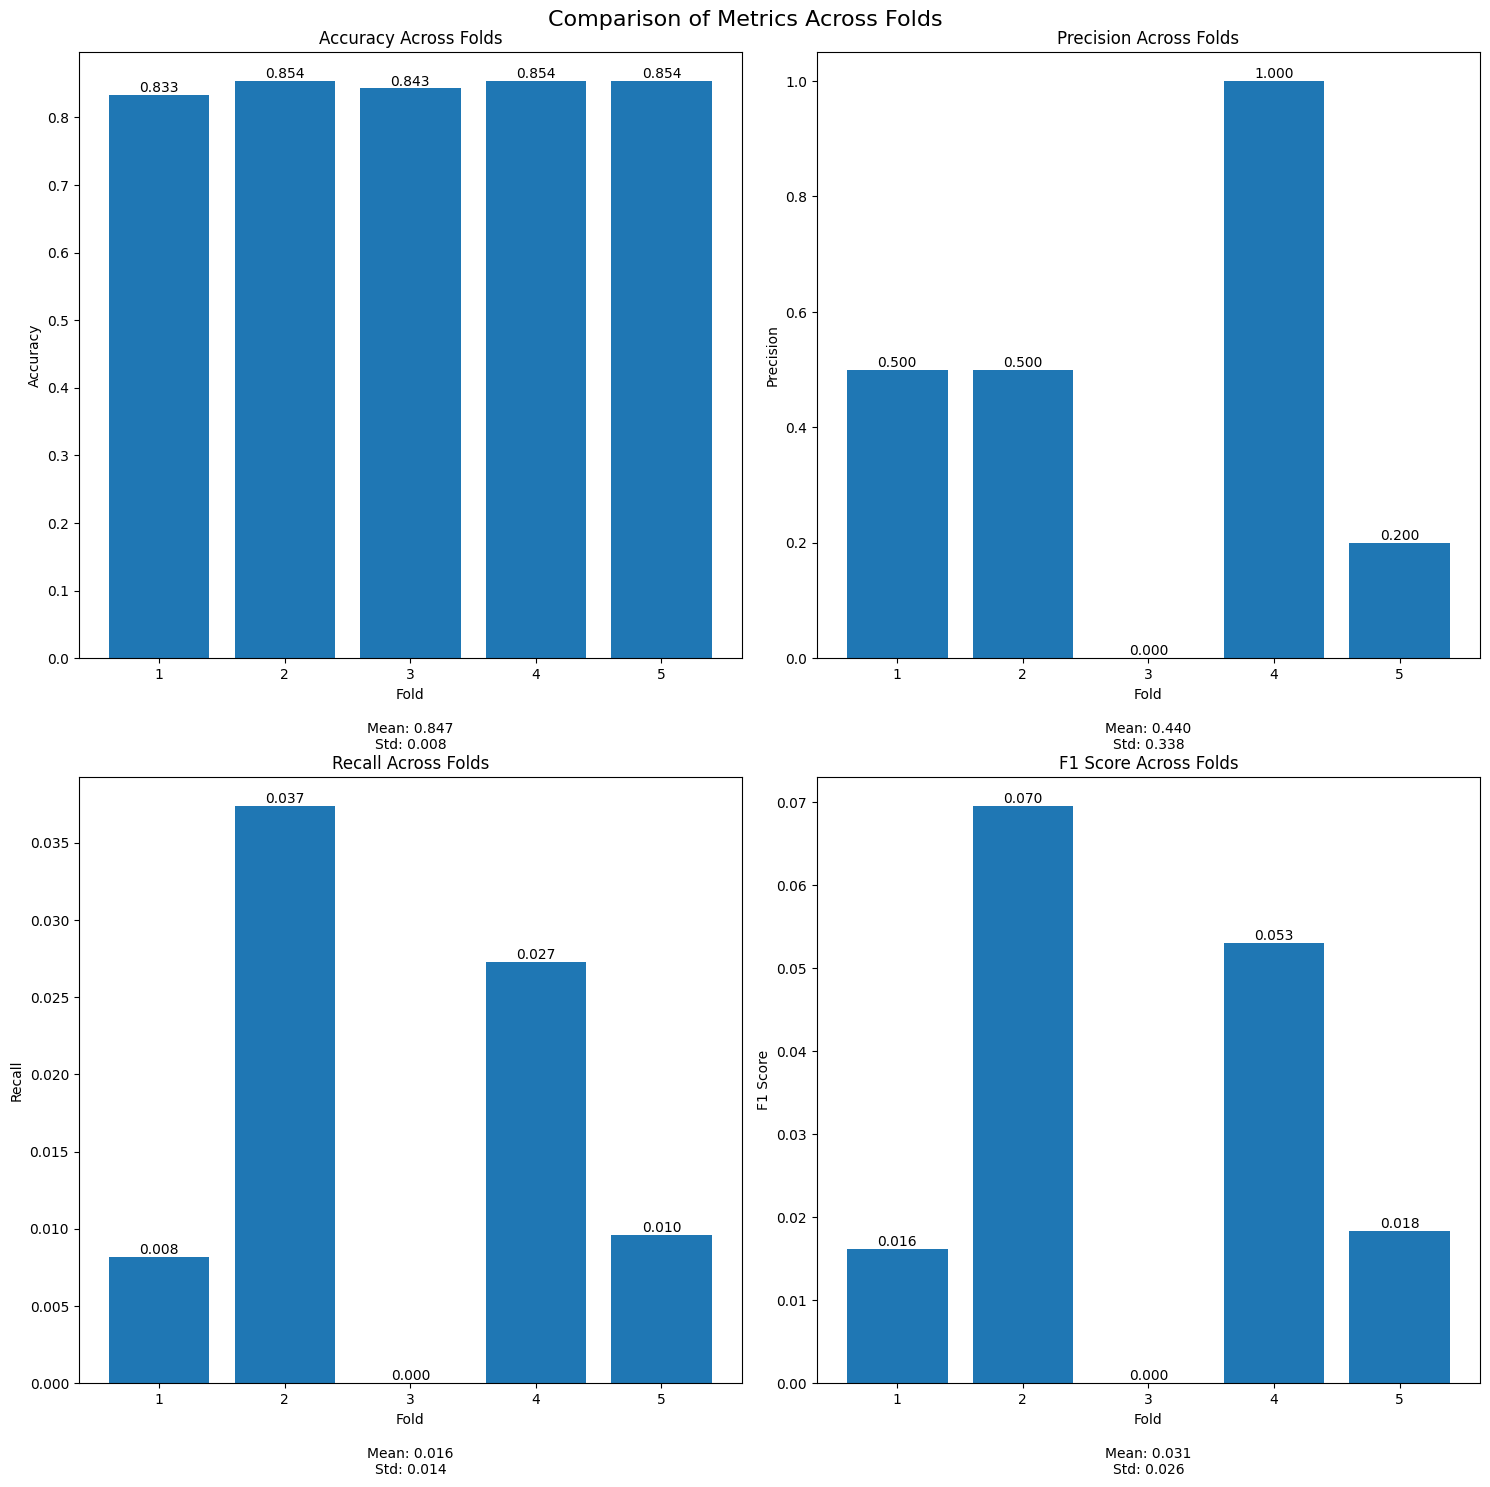

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# K-Fold Cross Validation function
def k_fold_cross_validation(X, y, k=5, learning_rate=0.01, iterations=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    all_train_losses = []
    all_val_losses = []
    all_train_accuracies = []
    all_val_accuracies = []
    
    fold = 1
    for train_index, val_index in kf.split(X):
        print(f"Fold {fold}:")
        fold += 1
        
        # Split the data into training and validation sets
        X_train_new, X_val_new = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Train the model on the training set
        W, b, train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression(
            X_train_new, y_train, X_val_new, y_val, learning_rate=learning_rate, iterations=iterations
        )
        
        # Store the losses and accuracies for this fold
        all_train_losses.append(train_losses)
        all_val_losses.append(val_losses)
        all_train_accuracies.append(train_accuracies)
        all_val_accuracies.append(val_accuracies)
        
        # Predict on the validation set
        y_val_pred = predict(X_val_new, W, b)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    
    # Calculate and print average and standard deviation for each metric
    print("\n--- Cross-Validation Results ---")
    print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Average Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Average Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    
    # Plot the average learning curves
    plot_average_learning_curves(all_train_losses, all_val_losses, all_train_accuracies, all_val_accuracies)
    
    # Plot all folds together
    plot_together(accuracies, precisions, recalls, f1_scores)
    
    return accuracies, precisions, recalls, f1_scores

# Function to plot average learning curves
def plot_average_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(np.mean(train_losses, axis=0), label='Train Loss')
    plt.plot(np.mean(val_losses, axis=0), label='Validation Loss')
    plt.title('Average Loss vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(np.mean(train_accuracies, axis=0), label='Train Accuracy')
    plt.plot(np.mean(val_accuracies, axis=0), label='Validation Accuracy')
    plt.title('Average Accuracy vs Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Function to plot all folds together
def plot_together(accuracies, precisions, recalls, f1_scores):
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Comparison of Metrics Across Folds', fontsize=16)
    
    # List of metrics
    metrics = [accuracies, precisions, recalls, f1_scores]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    for i, (metric, name) in enumerate(zip(metrics, metric_names)):
        row = i // 2
        col = i % 2
        
        axs[row, col].bar(range(1, len(metric) + 1), metric)
        axs[row, col].set_title(f'{name} Across Folds')
        axs[row, col].set_xlabel('Fold')
        axs[row, col].set_ylabel(name)
        axs[row, col].set_xticks(range(1, len(metric) + 1))
        
        # Add value labels on top of each bar
        for j, v in enumerate(metric):
            axs[row, col].text(j+1, v, f'{v:.3f}', ha='center', va='bottom')
        
        # Add mean and std as text
        mean = np.mean(metric)
        std = np.std(metric)
        axs[row, col].text(0.5, -0.15, f'Mean: {mean:.3f}\nStd: {std:.3f}', 
                           transform=axs[row, col].transAxes, ha='center')
    
    plt.tight_layout()
    plt.show()

# Run 5-fold cross-validation
X_whole_scaled_for_k_fold = min_max_scale(X)
accuracies, precisions, recalls, f1_scores = k_fold_cross_validation(X_whole_scaled_for_k_fold, y, k=5)

## f.
- This implementation will stop training if the validation loss doesn't improve by at least 0.001 for 50 consecutive iterations. You can adjust the patience and min_delta values to make the early stopping more or less sensitive.

In [29]:
def logistic_regression_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate=0.0001, iterations=10000, patience=50, min_delta=0.001):
    """
    Train the logistic regression model using batch gradient descent with early stopping
    
    Parameters:
    - patience: Number of iterations to wait for improvement before stopping
    - min_delta: Minimum change in validation loss to qualify as an improvement
    """
    n = X_train.shape[1]  # Number of features
    W, b = initialize_parameters(n)

    # Lists to store metrics for plotting
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    # Early stopping variables
    best_val_loss = float('inf')
    best_W, best_b = None, None
    counter = 0
    
    for i in range(iterations):
        # Perform one step of gradient descent
        W, b = gradient_descent(X_train, y_train, W, b, learning_rate)
        
        # Compute predictions
        y_train_pred = sigmoid(np.dot(X_train, W) + b)
        y_val_pred = sigmoid(np.dot(X_val, W) + b)
        
        # Compute and store losses
        train_loss = compute_loss(y_train, y_train_pred)
        val_loss = compute_loss(y_val, y_val_pred)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Compute and store accuracies
        train_acc = accuracy_score(y_train, predict(X_train, W, b))
        val_acc = accuracy_score(y_val, predict(X_val, W, b))
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        # Early stopping check
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            best_W, best_b = W.copy(), b
            counter = 0
        else:
            counter += 1
        
        # If no improvement in 'patience' iterations, stop training
        if counter >= patience:
            print(f"Early stopping triggered at iteration {i}")
            break
        
        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    # Use the best model found during training
    if best_W is not None and best_b is not None:
        W, b = best_W, best_b
    
    plot_results(train_losses, val_losses, train_accuracies, val_accuracies)
    
    return W, b, train_losses, val_losses, train_accuracies, val_accuracies

Iteration 0: Train Loss: 4.1830, Validation Loss: 4.1013
Iteration 100: Train Loss: 2.5957, Validation Loss: 2.5593
Iteration 200: Train Loss: 1.3587, Validation Loss: 1.3607
Iteration 300: Train Loss: 0.7523, Validation Loss: 0.7704
Iteration 400: Train Loss: 0.5503, Validation Loss: 0.5704
Iteration 500: Train Loss: 0.4824, Validation Loss: 0.5018
Iteration 600: Train Loss: 0.4561, Validation Loss: 0.4746
Iteration 700: Train Loss: 0.4445, Validation Loss: 0.4624
Iteration 800: Train Loss: 0.4388, Validation Loss: 0.4564
Iteration 900: Train Loss: 0.4359, Validation Loss: 0.4533
Early stopping triggered at iteration 957


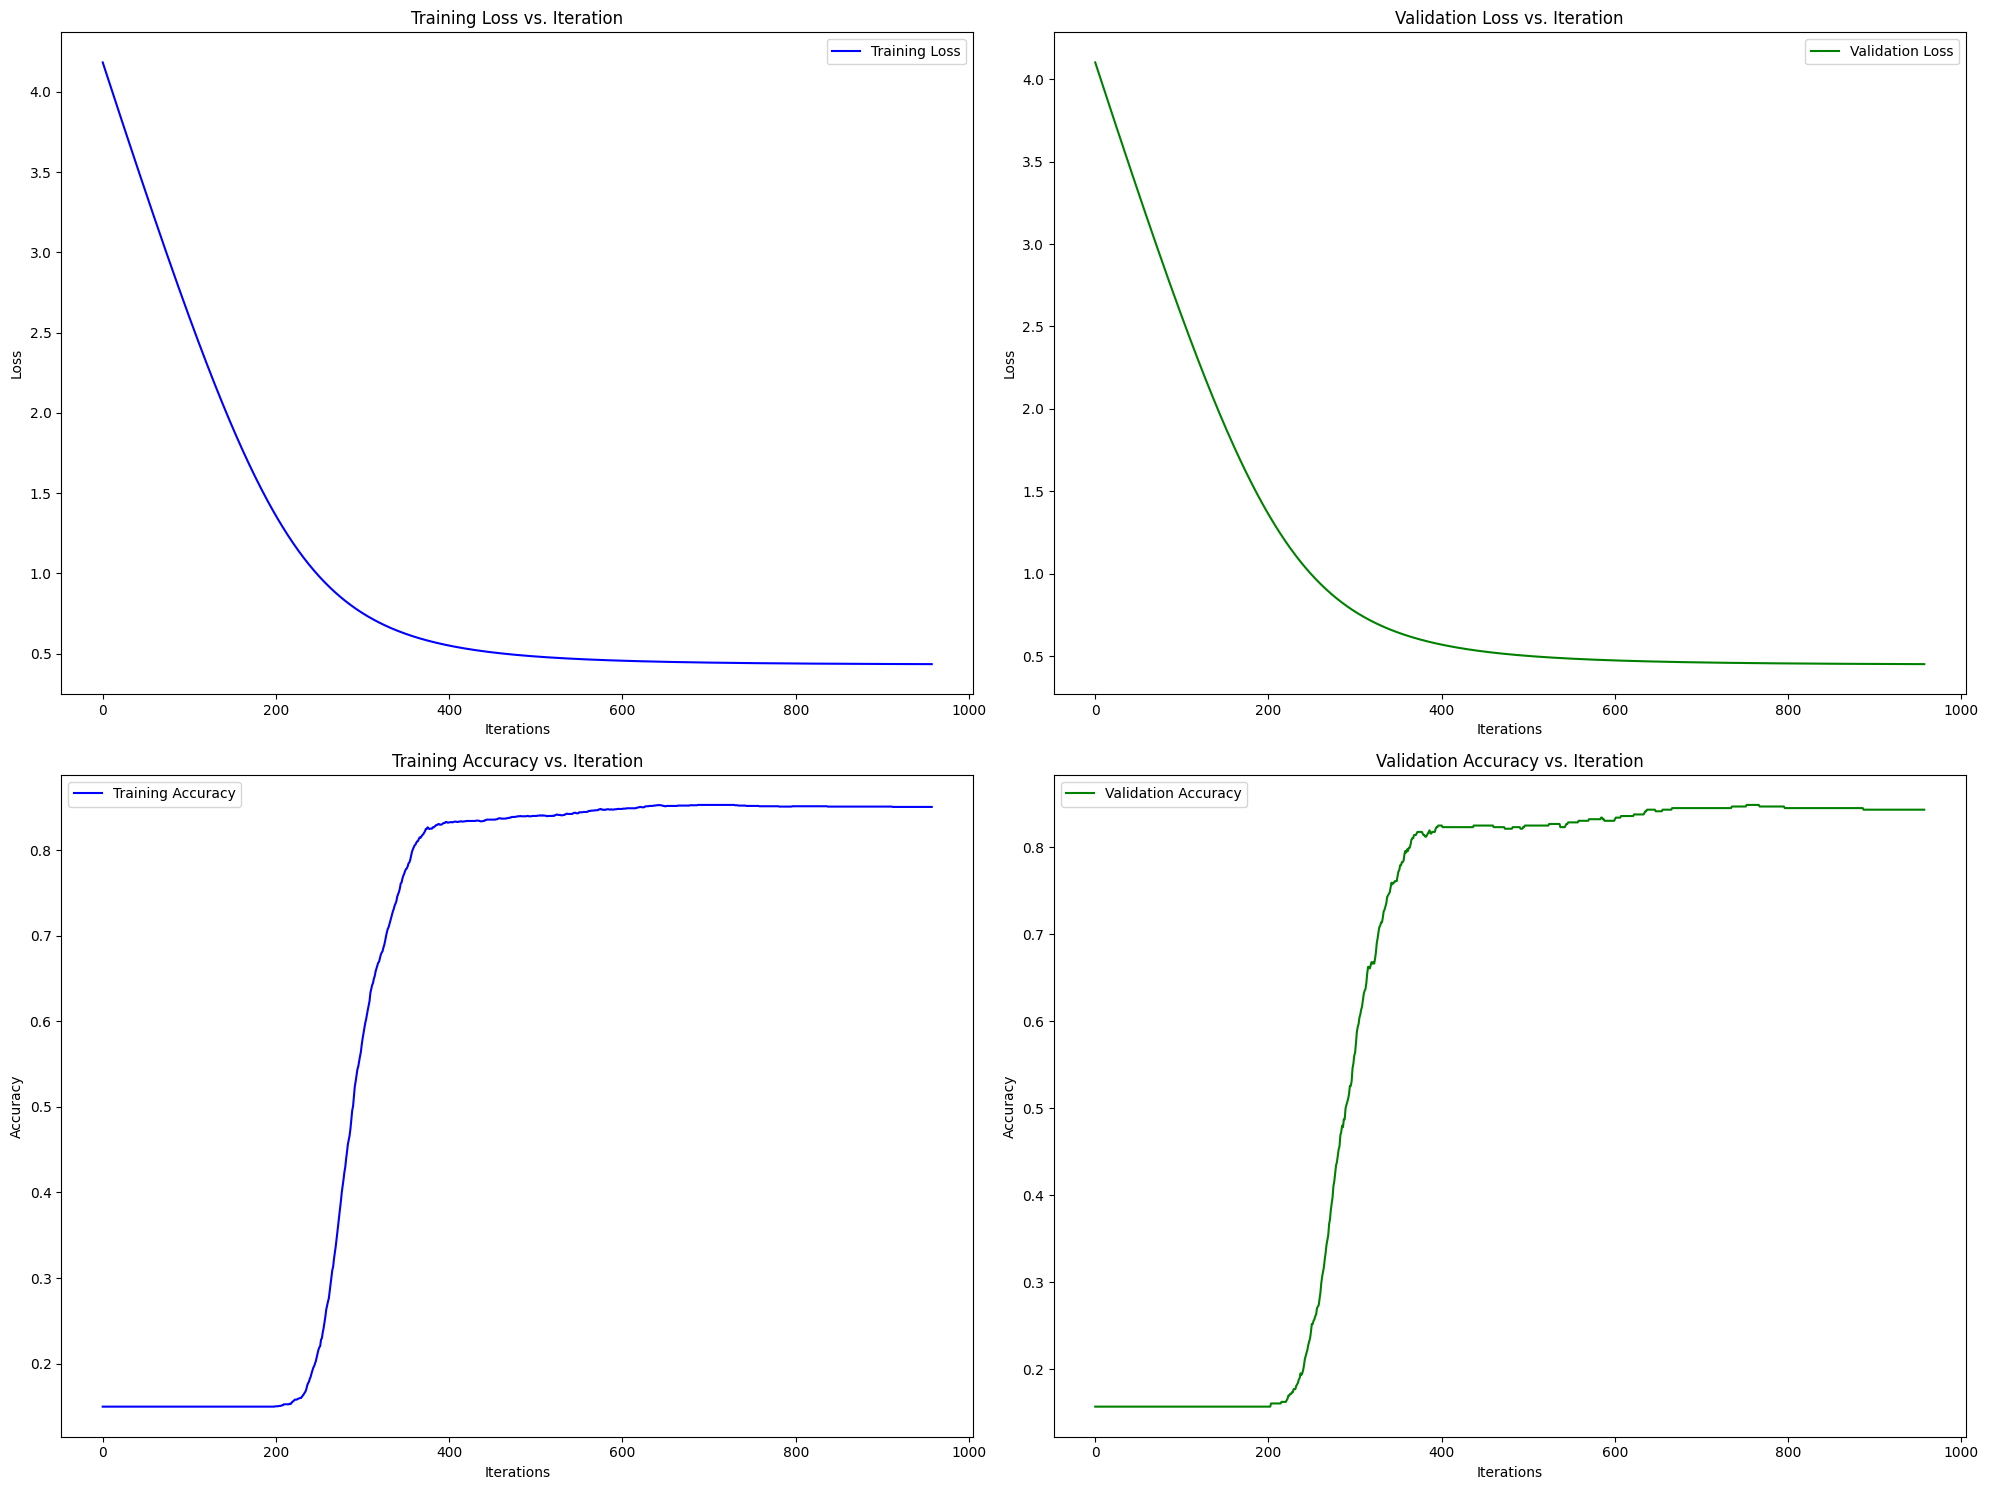

Iteration 0: Train Loss: 4.1830, Validation Loss: 4.1013
Iteration 100: Train Loss: 2.5957, Validation Loss: 2.5593
Iteration 200: Train Loss: 1.3587, Validation Loss: 1.3607
Iteration 300: Train Loss: 0.7523, Validation Loss: 0.7704
Iteration 400: Train Loss: 0.5503, Validation Loss: 0.5704
Iteration 500: Train Loss: 0.4824, Validation Loss: 0.5018
Iteration 600: Train Loss: 0.4561, Validation Loss: 0.4746
Iteration 700: Train Loss: 0.4445, Validation Loss: 0.4624
Iteration 800: Train Loss: 0.4388, Validation Loss: 0.4564
Iteration 900: Train Loss: 0.4359, Validation Loss: 0.4533
Iteration 1000: Train Loss: 0.4343, Validation Loss: 0.4516
Iteration 1100: Train Loss: 0.4334, Validation Loss: 0.4506
Iteration 1200: Train Loss: 0.4329, Validation Loss: 0.4500
Iteration 1300: Train Loss: 0.4326, Validation Loss: 0.4497
Iteration 1400: Train Loss: 0.4324, Validation Loss: 0.4496
Iteration 1500: Train Loss: 0.4323, Validation Loss: 0.4496
Iteration 1600: Train Loss: 0.4324, Validation Loss:

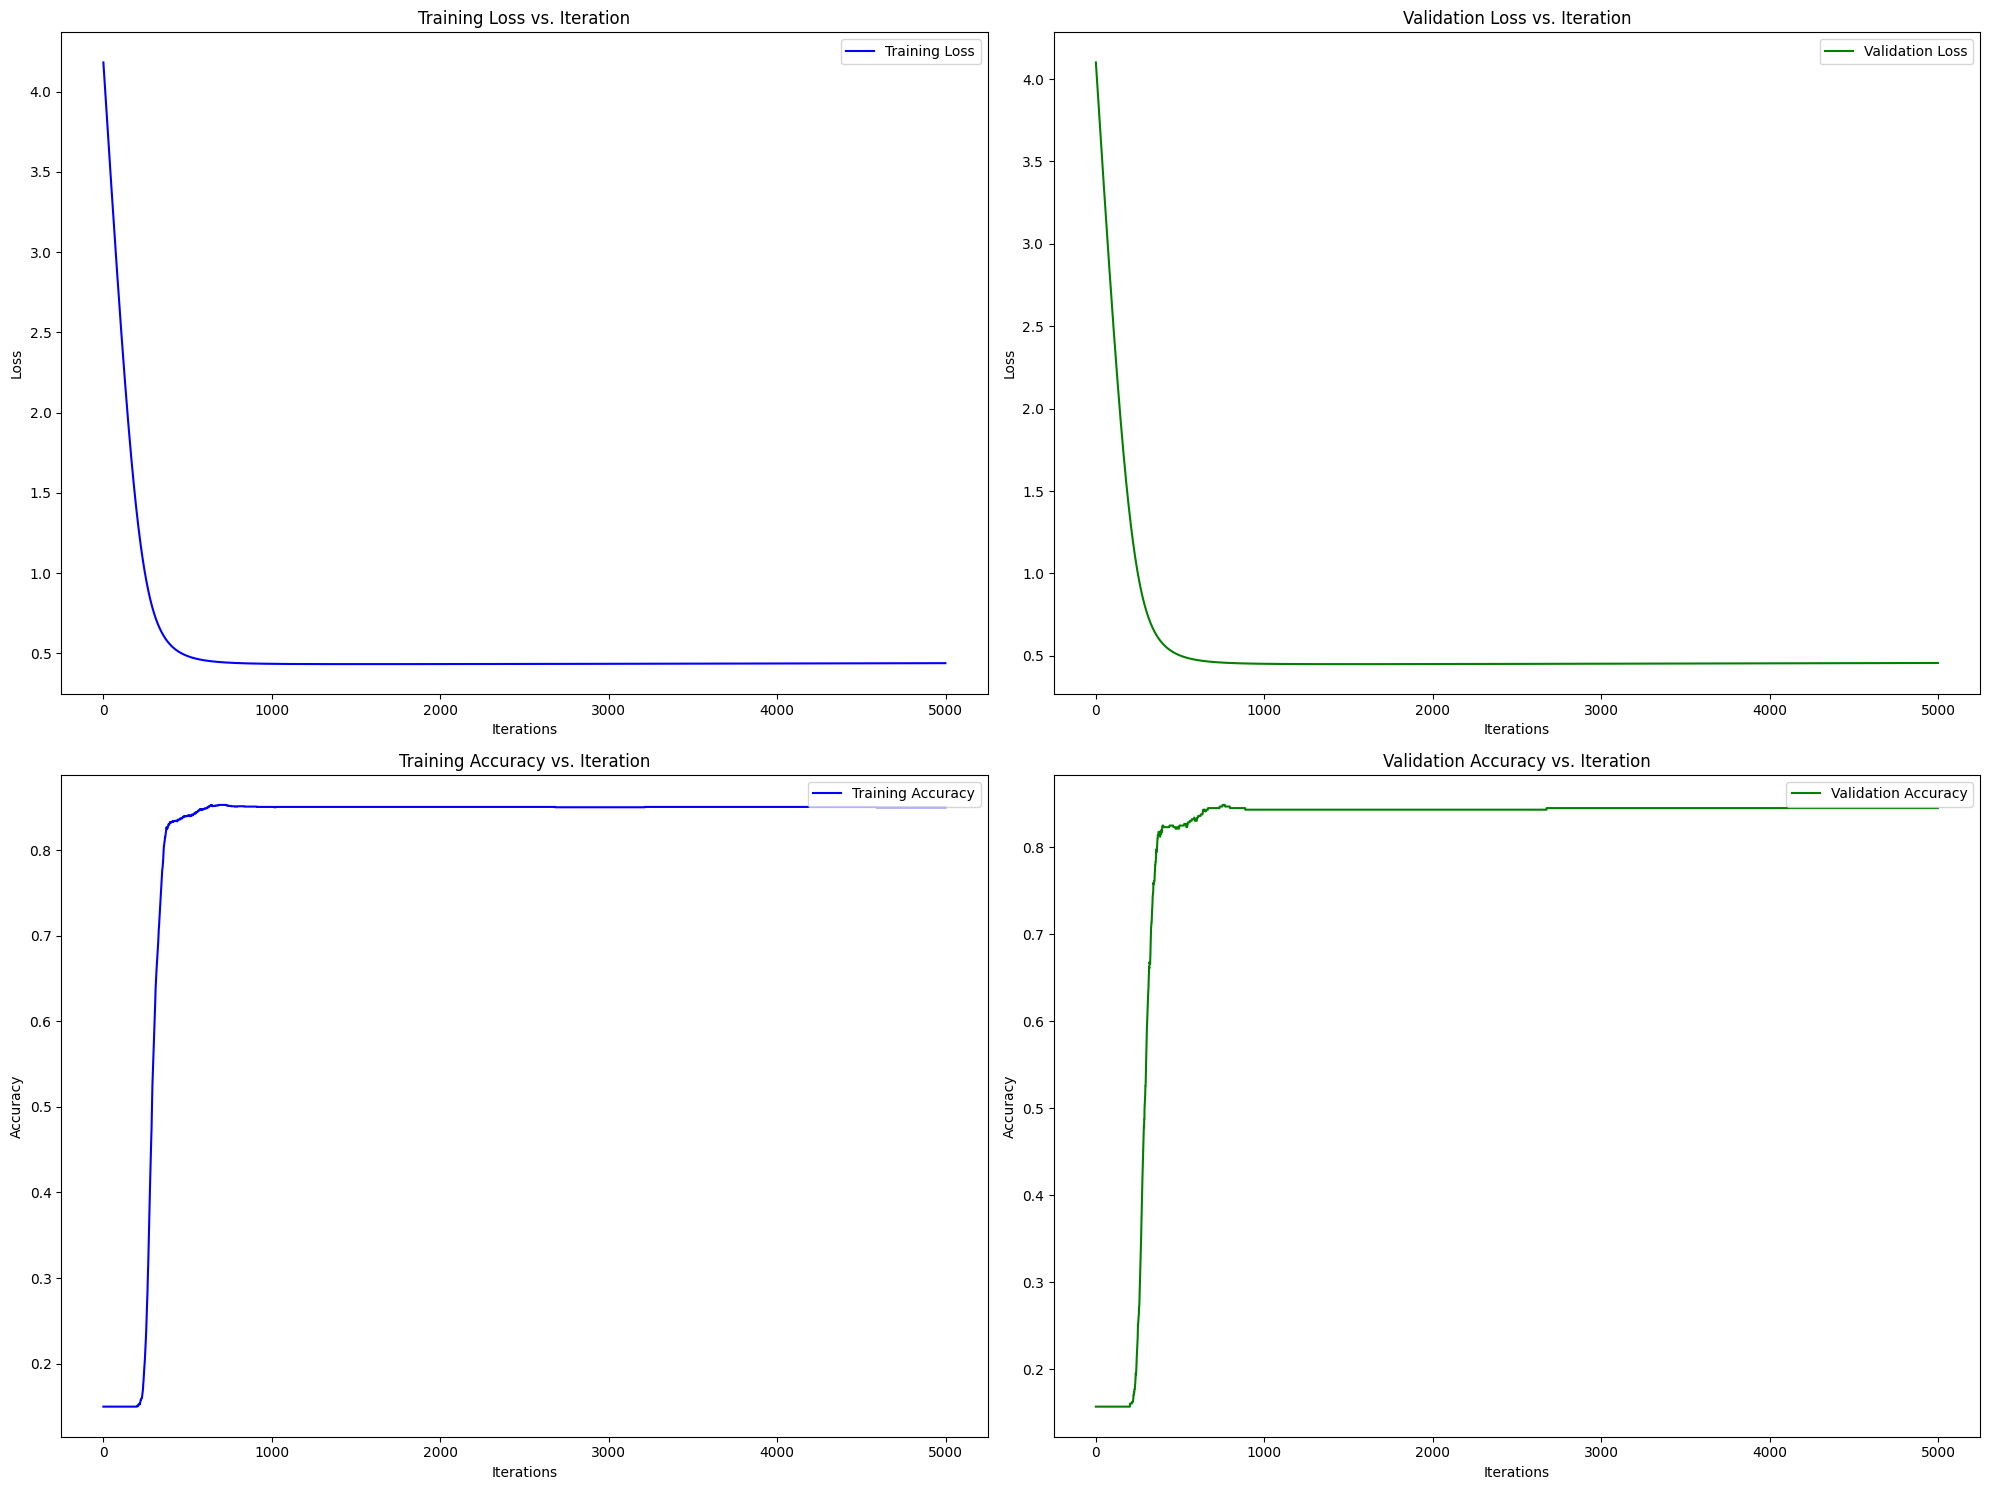

In [33]:
# comparing with and without our defined stopping criteria
W_earlyStop, b_earlyStop, train_losses_earlyStop, val_losses_earlyStop, train_accuracies_earlyStop, val_accuracies_earlyStop = logistic_regression_with_early_stopping(X_train_scaled, y_train, X_val_scaled, y_val,learning_rate=0.01,iterations=5000)
#  = logistic_regression() i have this already computed
W_withoutStop, b_withoutStop, train_losses_withoutStop, val_losses_withoutStop, train_accuracies_withoutStop, val_accuracies_withoutStop = logistic_regression(X_train_scaled, y_train, X_val_scaled, y_val,learning_rate=0.01,iterations=5000) 


## Comparing with and without earlystopping

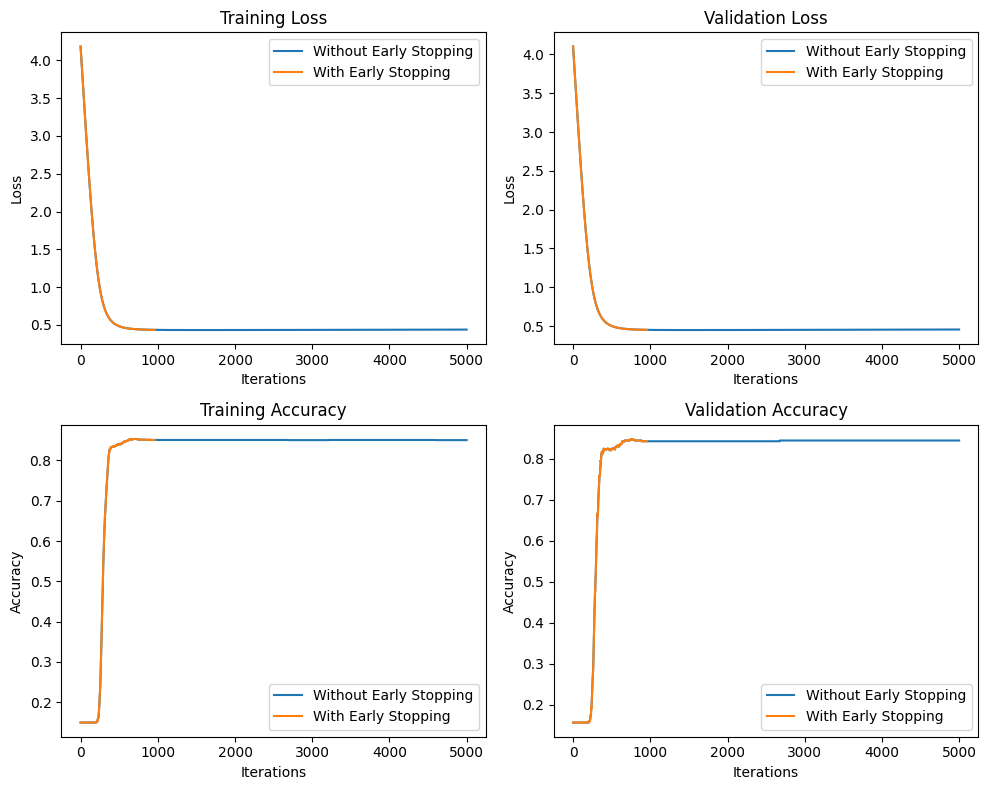

Test Accuracy without Early Stopping: 0.8372334531073221
Test Accuracy with Early Stopping: 0.8335207912382507


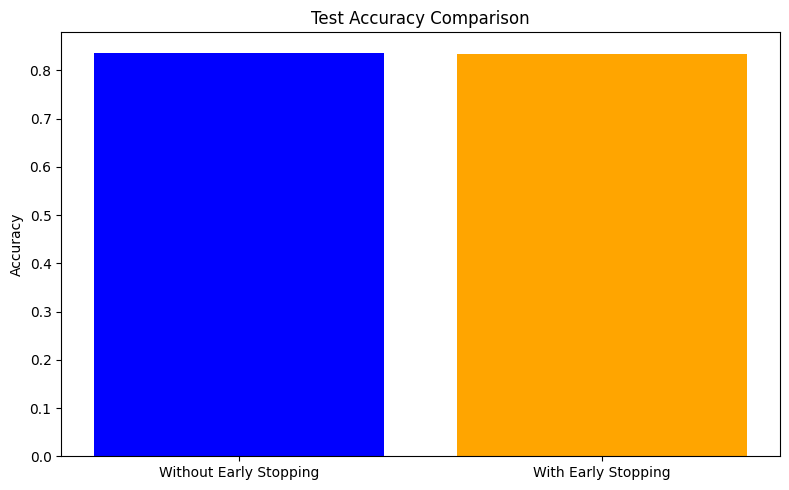

In [35]:
import matplotlib.pyplot as plt

# Using test set to compare performance between the two
# X_test_scaled y_test
# Using test set to compare performance between the two
def compare_on_test_set(W_withoutStop, b_withoutStop, W_earlyStop, b_earlyStop, X_test_scaled, y_test):
    y_pred_withoutStop = predict(X_test_scaled, W_withoutStop, b_withoutStop)
    y_pred_earlyStop = predict(X_test_scaled, W_earlyStop, b_earlyStop)
    
    # Convert probabilities to class labels
    y_pred_withoutStop = (y_pred_withoutStop >= 0.5).astype(int)
    y_pred_earlyStop = (y_pred_earlyStop >= 0.5).astype(int)
    
    # Calculate accuracy
    accuracy_withoutStop = np.mean(y_pred_withoutStop == y_test)
    accuracy_earlyStop = np.mean(y_pred_earlyStop == y_test)
    
    print(f"Test Accuracy without Early Stopping: {accuracy_withoutStop}")
    print(f"Test Accuracy with Early Stopping: {accuracy_earlyStop}")
    
    # Plotting the comparison
    labels = ['Without Early Stopping', 'With Early Stopping']
    test_accuracies = [accuracy_withoutStop, accuracy_earlyStop]
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot test accuracy
    ax.bar(labels, test_accuracies, color=['blue', 'orange'])
    ax.set_title('Test Accuracy Comparison')
    ax.set_ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()

def plot_performance_comparison(train_losses_withoutStop, val_losses_withoutStop, train_accuracies_withoutStop, val_accuracies_withoutStop,
                                train_losses_earlyStop, val_losses_earlyStop, train_accuracies_earlyStop, val_accuracies_earlyStop):
    """ Plot the performance comparison between the two models for validation & training loss"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
    
    # Plot training loss
    ax1.plot(train_losses_withoutStop, label='Without Early Stopping')
    ax1.plot(train_losses_earlyStop, label='With Early Stopping')
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot validation loss
    ax2.plot(val_losses_withoutStop, label='Without Early Stopping')
    ax2.plot(val_losses_earlyStop, label='With Early Stopping')
    ax2.set_title('Validation Loss')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    # Plot training accuracy
    ax3.plot(train_accuracies_withoutStop, label='Without Early Stopping')
    ax3.plot(train_accuracies_earlyStop, label='With Early Stopping')
    ax3.set_title('Training Accuracy')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Accuracy')
    ax3.legend()
    
    # Plot validation accuracy
    ax4.plot(val_accuracies_withoutStop, label='Without Early Stopping')
    ax4.plot(val_accuracies_earlyStop, label='With Early Stopping')
    ax4.set_title('Validation Accuracy')
    ax4.set_xlabel('Iterations')
    ax4.set_ylabel('Accuracy')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the comparison
plot_performance_comparison(train_losses_withoutStop, val_losses_withoutStop, train_accuracies_withoutStop, val_accuracies_withoutStop,
                            train_losses_earlyStop, val_losses_earlyStop, train_accuracies_earlyStop, val_accuracies_earlyStop)

# Call the function to compare on test set
compare_on_test_set(W_withoutStop, b_withoutStop, W_earlyStop, b_earlyStop, X_test_scaled, y_test)

# Using Regularization

## L1 Regularization (Lasso)
- L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients to the loss function.
- It encourages sparsity in the model by driving some coefficients exactly to zero, effectively performing feature selection.
- Experimenting with different L1 regularization strengths (lambda values) allows you to change penalty strength and control the trade-off between model complexity and sparsity.
- ![L1 Regularization](https://aunnnn.github.io/ml-tutorial/html/_images/img_l1_surface.png) (source: [https://aunnnn.github.io/ml-tutorial/html/_images/img_l1_surface.png])

## L2 Regularization (Ridge)
- L2 regularization adds a penalty equal to the square of the magnitude of the coefficients to the loss function.
- It shrinks the coefficients towards zero but does not make them exactly zero.
- Experimenting with different L2 regularization strengths (lambda values) helps control overfitting by limiting the magnitude penalty.
- ![L2 Regularization](https://aunnnn.github.io/ml-tutorial/html/_images/img_l2_surface_lambdas.png) (source: [https://aunnnn.github.io/ml-tutorial/html/_images/img_l2_surface_lambdas.png])

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score

def compute_loss(y_true, y_pred, W, lambda_param=0, regularization='none'):
    """Compute the binary cross-entropy loss with regularization"""
    m = y_true.shape[0]
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    loss = -np.mean(y_zero_loss + y_one_loss)
    
    if regularization == 'l1':
        loss += (lambda_param / m) * np.sum(np.abs(W))
    elif regularization == 'l2':
        loss += (lambda_param / (2 * m)) * np.sum(W**2)
    
    return loss

def gradient_descent(X, y, W, b, learning_rate, lambda_param=0, regularization='none'):
    """Perform one step of gradient descent with regularization"""
    m = X.shape[0]  # Number of training examples
    y_hat = sigmoid(np.dot(X, W) + b)  # Predicted probabilities
    
    # Compute gradients
    dW = np.dot(X.T, (y_hat - y.reshape(-1, 1))) / m
    db = np.sum(y_hat - y.reshape(-1, 1)) / m
    
    # Add regularization term to dW
    if regularization == 'l1':
        dW += (lambda_param / m) * np.sign(W)
    elif regularization == 'l2':
        dW += (lambda_param / m) * W
    
    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db
    
    return W, b

def logistic_regression_regularized(X_train, y_train, X_val, y_val, learning_rate=0.001, iterations=1000, lambda_param=0.1, regularization='none'):
    """Train the logistic regression model using batch gradient descent with regularization"""
    n = X_train.shape[1]  # Number of features
    W, b = initialize_parameters(n)

    # Lists to store metrics for plotting
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for i in range(iterations):
        # Perform one step of gradient descent
        W, b = gradient_descent(X_train, y_train, W, b, learning_rate, lambda_param, regularization)
        
        # Compute predictions
        y_train_pred = sigmoid(np.dot(X_train, W) + b)
        y_val_pred = sigmoid(np.dot(X_val, W) + b)
        
        # Compute and store losses
        train_loss = compute_loss(y_train, y_train_pred, W, lambda_param, regularization)
        val_loss = compute_loss(y_val, y_val_pred, W, lambda_param, regularization)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Compute and store accuracies
        train_acc = accuracy_score(y_train, predict(X_train, W, b))
        val_acc = accuracy_score(y_val, predict(X_val, W, b))
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    return W, b, train_losses, val_losses, train_accuracies, val_accuracies


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the sigmoid and predict functions remain unchanged
learning_rate_list = [0.001, 0.01, 0.1, 0.5]
lambda_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Store results for plotting
results = []
test_accuracy_results = []

for lr in learning_rate_list:
    for lambda_param in lambda_param_list:
        print(f"Learning Rate: {lr}, Lambda: {lambda_param}")
        # run the logistic regression model with regularization for both L1 and L2
        # running for l1 (lasso)
        W_l1, b_l1, train_losses_l1, val_losses_l1, train_accuracies_l1, val_accuracies_l1 = logistic_regression_regularized(
            X_train_scaled, y_train, X_val_scaled, y_val, learning_rate=lr, iterations=50, lambda_param=lambda_param, regularization='l1')
        # running for l2 (ridge)
        W_l2, b_l2, train_losses_l2, val_losses_l2, train_accuracies_l2, val_accuracies_l2 = logistic_regression_regularized(
            X_train_scaled, y_train, X_val_scaled, y_val, learning_rate=lr, iterations=50, lambda_param=lambda_param, regularization='l2')
        
        # compare the test accuracy for both L1 and L2 regularization
        test_pred_l1 = predict(X_test_scaled, W_l1, b_l1)   
        test_accuracy_l1 = accuracy_score(y_test, test_pred_l1)
        test_pred_l2 = predict(X_test_scaled, W_l2, b_l2)
        test_accuracy_l2 = accuracy_score(y_test, test_pred_l2)

        print(f"Test Accuracy (L1): {test_accuracy_l1:.4f}")
        print(f"Test Accuracy (L2): {test_accuracy_l2:.4f}")
        test_accuracy_results.append((lr, lambda_param, test_accuracy_l1, test_accuracy_l2))

        # Store results
        results.append((lr, lambda_param, train_losses_l1, val_losses_l1, 'L1'))
        results.append((lr, lambda_param, train_losses_l2, val_losses_l2, 'L2'))

# Plotting validation loss vs iteration and training loss vs iteration each different learning rates using different lambda values
for lr in learning_rate_list:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    for lambda_param in lambda_param_list:
        for reg_type in ['L1', 'L2']:
            # Filter results for current learning rate, lambda, and regularization type
            filtered_results = [(lr_, lambda_, train_losses, val_losses, reg) for lr_, lambda_, train_losses, val_losses, reg in results if lr_ == lr and lambda_ == lambda_param and reg == reg_type]
            
            if filtered_results:
                _, _, train_losses, val_losses, _ = filtered_results[0]
                ax1.plot(train_losses, label=f'Train Loss (Lambda={lambda_param}, Reg={reg_type})')
                ax2.plot(val_losses, label=f'Val Loss (Lambda={lambda_param}, Reg={reg_type})')
    
    ax1.set_title(f'Training Loss vs Iterations (LR={lr})')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.set_title(f'Validation Loss vs Iterations (LR={lr})')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plotting test accuracy for different learning rates and lambda values
test_accuracy_results = np.array(test_accuracy_results)
plt.figure(figsize=(12, 8))

for lr in learning_rate_list:
    lr_results = test_accuracy_results[test_accuracy_results[:, 0] == lr]
    for lambda_param in lambda_param_list:
        lambda_results = lr_results[lr_results[:, 1] == lambda_param]
        if lambda_results.size > 0:
            plt.plot(lambda_results[:, 1], lambda_results[:, 2], marker='o', label=f'Test Accuracy (LR={lr}, Lambda={lambda_param}, L1)')
            plt.plot(lambda_results[:, 1], lambda_results[:, 3], marker='x', label=f'Test Accuracy (LR={lr}, Lambda={lambda_param}, L2)')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Learning Rates and Lambda Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Learning Rate: 0.001, Lambda: 0.0001


TypeError: gradient_descent() takes 5 positional arguments but 7 were given

In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming learning_rate_list, lambda_param_list, results, X_test_scaled, y_test, and predict are defined

# Testing on the test set and reporting accuracy
results_table = []

for lr in learning_rate_list:
    for lambda_param in lambda_param_list:
        for reg_type in ['L1', 'L2']:
            # Filter results for current learning rate, lambda, and regularization type
            filtered_results = [(lr_, lambda_, W, b, reg) for lr_, lambda_, W, b, reg in results if lr_ == lr and lambda_ == lambda_param and reg == reg_type]
            
            if filtered_results:
                _, _, W, b, _ = filtered_results[0]
                test_accuracy = accuracy_score(y_test, predict(X_test_scaled, W, b))
                results_table.append((lr, lambda_param, reg_type, test_accuracy))

# Create a DataFrame to display the results
df_results = pd.DataFrame(results_table, columns=['Learning Rate', 'Lambda', 'Regularization', 'Test Accuracy'])

# Display the table
print(df_results)

ValueError: shapes (549,15) and (1000,) not aligned: 15 (dim 1) != 1000 (dim 0)

## Conclusion
- 